# Линейная регрессия

### 1. Общее уравнение линейной регрессии и постановка задачи:

Пусть имеется выборка из $n$ объектов, каждый из которых описан с помощью $m$ переменных: 

$$
\mathbf{x}_{i} = (x_{i}^{1}, \ldots, x_{i}^{m}) \in \mathbb{R}^{m}, \quad i = \overline{1, n}.
$$

Пусть, кроме того, каждому объекту соответствует некоторый ответ $y_{i} \in \mathbb{R}$, $i = \overline{1, n}$.


Задача отыскания зависимости между значением переменной $y_{i}$ и признаками $x_{i}^{1}, \ldots, x_{i}^{m}$ в виде линейной комбинации этих признаков с некоторыми весами $w_{j}$ называется *задачей линейной регрессии*. Переменная $y_{i}$ называется *зависимой* переменной (*целевая* переменная, *таргет*), а переменные $\mathbf{x}^{1}, \ldots, \mathbf{x}^{m}$ - *независимыми* переменными (*признаками*, *предикторами*, *факторами*). 


В общем виде уравнение линейной регрессии выглядит так:
$$
a(\mathbf{x}_{i}) = w_{0} + \sum\limits_{j = 1}^{m}w_{j}x_{i}^{j} = w_{0} + \Big(\mathbf{w}, \mathbf{x}_{i}\Big), \quad i = \overline{1, n},
$$
где $w_{0}$ - свободный коэффициент (сдвиг). 

Если добавить еще один признак, равный $1$ на всех объектах, то получим более компактную запись уравнения линейной регрессии:
$$
a(\mathbf{x}_{i}) = \Big(\mathbf{w}, \mathbf{x}_{i}\Big), \quad i = \overline{1, n}.
$$

*Замечание:* для удобства оставили прежние названия: $\mathbf{x}_{i}$ и $\mathbf{w}$.

Решить задачу линейной регрессии - значит найти коэффициенты $w_{j}, j = \overline{1, m}$, а также свободный член $w_{0}$, которые доставляют минимум функционалу ошибки $Q(a, \mathbf{X})$:

$$
Q(a, \mathbf{X}) \to \min_{a},
$$
где $\mathbf{X}$ - матрица, строками которой является векторы $\mathbf{x}_{i}$.

Заметим, что в случае линейной модели данный функционал можно переписать в виде функции $Q(\mathbf{w}, \mathbf{X})$. Тогда задача оптимизации сводится к следующей:

$$
Q(\mathbf{w}, \mathbf{X}) \to \min_{\mathbf{w}}
$$

### 2. Виды функций потерь и функционала ошибки:

1. **Квадратичная функция потерь** 
$$
L\Big(y_{i}, a(\mathbf{x}_{i})\Big) = \Big(y_{i} - a(\mathbf{x}_{i})\Big)^{2}
$$

В этом случае, в качестве функционала ошибки используют *среднеквадратическую ошибку* [(*Mean Squared Error*)](https://en.wikipedia.org/wiki/Mean_squared_error) или *корень из среднеквадратической ошибки* [(*Root Mean Squared Error*)](https://en.wikipedia.org/wiki/Root-mean-square_deviation):

$$
Q(a, \mathbf{X}) = MSE(a, \mathbf{X}) = \frac{1}{n}\sum\limits_{i = 1}^{n}\Big(y_{i} - a(\mathbf{x}_{i})\Big)^{2},
$$

$$
Q(a, \mathbf{X}) = RMSE(a, \mathbf{X}) = \sqrt{\frac{1}{n}\sum\limits_{i = 1}^{n}\Big(y_{i} - a(\mathbf{x}_{i})\Big)^{2}}.
$$

В случае, если $a$ - константный алгоритм имеем

$$
Q = \frac{1}{n}\sum\limits_{i = 1}^{n}\Big(y_{i} - a\Big)^{2} \Rightarrow Q_{a}^{'} = -\frac{2}{n}\sum\limits_{i = 1}^{n}\Big(y_{i} - a\Big).
$$

Тогда решая уравнение $Q_{a}^{'} = 0$ получим, что $\sum\limits_{i = 1}^{n}\Big(y_{i} - a\Big) = 0$.

Следовательно, в случае квадратичной функции потерь и константного алгоритма, оптимальным является

$$
a^{*} = mean(\mathbf{y}) = \frac{1}{n}\sum\limits_{i = 1}^{n}y_{i}.
$$

*Достоинства*:
   - дифференцируема (удобно применять оптимизационные методы);
   - выпукла (отсутствуют локальные экстремумы).
     
*Недостатки*:
   - неустойчива к выбросам (поскольку ошибка на каждом объекте возводится в квадрат, то слагаемое соответствующее выбросу будет давать большой вклад в сумму. Пытаясь минимизировать функционал ошибки, алгоритм будет подгоняться под выбросы);
   - зачастую по полученному значению функционала сложно оценить качество модели.
     
Для устранения последнего недостатка, часто используют *коэффициент детерминации* [($R^{2}$)](https://en.wikipedia.org/wiki/Coefficient_of_determination), который описывает долю дисперсии, объясненную рассматриваемой моделью:

$$
Q(a, \mathbf{X}) = R^{2}(a, \mathbf{X}) = 1 - \frac{\sum\limits_{i = 1}^{n}\Big(y_{i} - a(\mathbf{x}_{i})\Big)^{2}}{\sum\limits_{i = 1}^{n}\Big(y_{i} - \bar{y}\Big)^{2}}
$$


2. **Абсолютная функция потерь**
$$
L\Big(y_{i}, a(\mathbf{x}_{i})\Big) = \Big|y_{i} - a(\mathbf{x}_{i})\Big|
$$

В этом случае, в качестве функционала ошибки используют *среднюю абсолютную ошибку* [(*Mean Absolute Error*)](https://en.wikipedia.org/wiki/Mean_absolute_error):

$$
Q(a, \mathbf{X}) = MAE(a, \mathbf{X}) = \frac{1}{n}\sum\limits_{i = 1}^{n}\Big|y_{i} - a(\mathbf{x}_{i})\Big|.
$$

В случае, если $a$ - константный алгоритм имеем

$$
Q = \frac{1}{n}\sum\limits_{i = 1}^{n}\Big|y_{i} - a\Big| \Rightarrow Q_{a}^{'} = \frac{1}{n}\sum\limits_{i = 1}^{n}\frac{a - y_{i}}{\Big|y_{i} - a\Big|}. 
$$

Тогда решая уравнение $Q_{a}^{'} = 0$ получим, что $\sum\limits_{i = 1}^{n}\frac{a - y_{i}}{\Big|y_{i} - a\Big|} = 0$. Очевидно, что каждое из слагаемых в этой сумме равно $\pm 1$. Поэтому, в случае абсолютной функции потерь и константного алгоритма, оптимальным является 

$$
a^{*} = median(\mathbf{y}).
$$

*Достоинства*:
   - является более робастной чем MSE (поскольку штраф за выборосы не такой большой).
     
*Недостатки*:
   - не является дифференцируемой.
   
3. **Функция Хьюбера (Huber Loss)**

$$
L\Big(y_{i}, a(\mathbf{x}_{i})\Big) = h_{\delta} = \begin{cases}
\frac{1}{2}\Big(y_{i} - a(\mathbf{x}_{i})\Big)^{2}, & \text{если } \Big|y_{i} - a(\mathbf{x}_{i})\Big| \le \delta\\
\delta\Big|y_{i} - a(\mathbf{x}_{i})\Big| - \frac{1}{2}\delta^{2}, & \text{иначе}.
\end{cases}
$$

В окрестности нуля график функции [Хьюбера](https://en.wikipedia.org/wiki/Huber_loss) является параболой, при удалении от нуля на величину, превышающую $\delta$, график становится линейным. Таким образом, данная функция сочетает в себе достоинства и MSE (является дифференцируемой), и MAE (устойчива к выбросам).  

   
Вышеописанные функционалы ошибки являются **симметрическими**, то есть они одинаково штрафует как за недопрогноз, так и за перепрогноз. Существуют также и **несимметрические** функционалы ошибки. Эти функционалы необходимо применять в тех случаях, когда цена ошибки перепрогноза сильно отличается от цены ошибки недопрогноза. Например, в случаях когда мы предсказываем спрос на тот или иной товар. Если завысим прогноз, то придется держать его на складе (дополнительные расходы) либо продавать по заниженным ценам в случае, если он скоропортящийся, чтобы хоть как - то отбить свои потери. Если же мы ошибемся с прогнозом в меньшую сторону, то рискуем потерять лояльность части клиентов, что отразится на наших будущих доходах. Примером несимметричной функции потерь является **квантильная** ошибка.

4. **Квантильная функция потерь**
$$
L\Big(y_{i}, a(\mathbf{x}_{i})\Big) = \Bigg((\tau - 1)\Big[y_{i} < a(\mathbf{x}_{i})\Big] + \tau\Big[y_{i} \ge a(\mathbf{x}_{i})\Big]\Bigg)\Big(y_{i} - a(\mathbf{x}_{i})\Big)
$$

В этом случае, в качестве функционала ошибки используют *ошибку квантильной регрессии* [(*Quantile regression*)](https://en.wikipedia.org/wiki/Quantile_regression):

$$
Q(a, \mathbf{X}) = \frac{1}{n}\sum\limits_{i = 1}^{n}\Bigg((\tau - 1)\Big[y_{i} < a(\mathbf{x}_{i})\Big] + \tau\Big[y_{i} \ge a(\mathbf{x}_{i})\Big]\Bigg)\Big(y_{i} - a(\mathbf{x}_{i})\Big).
$$

В случае, если $a$ - константный алгоритм, получим, что оптимальным будет

$$
a^{*} = quantile(\mathbf{y}, \tau).
$$

*Достоинства*:
   - позволяет выставить разный вес ошибкам перепрогноза и недопрогноза.
     
*Недостатки*:
   - не является дифференцируемой.  
   

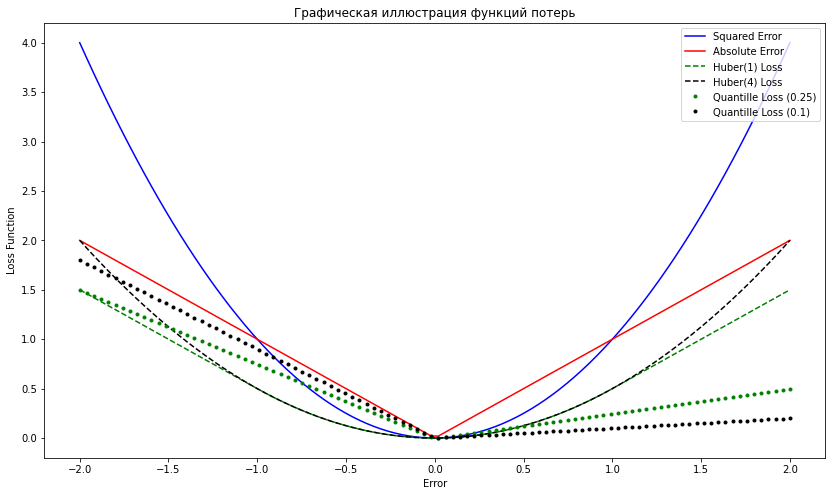

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

err = np.linspace(-2, 2, 100)

plt.figure(figsize = (14, 8))

plt.plot(err, err**2, 'b')
plt.plot(err, np.abs(err), 'r')
plt.plot(err, list(map(lambda x: 0.5 * x**2 if abs(x) <= 1 else abs(x) - 0.5, err)), 'g--')
plt.plot(err, list(map(lambda x: 0.5 * x**2 if abs(x) <= 4 else 4 * abs(x) - 8, err)), 'k--')
plt.plot(err, list(map(lambda x: -0.75 * x if x < 0 else 0.25 * x, err)), 'g.')
plt.plot(err, list(map(lambda x: -0.9 * x if x < 0 else 0.1 * x, err)), 'k.')

plt.legend(['Squared Error', 'Absolute Error', 'Huber(1) Loss', 'Huber(4) Loss',
            'Quantille Loss (0.25)', 'Quantille Loss (0.1)'], loc = 'upper right')
plt.xlabel('Error')
plt.ylabel('Loss Function')
plt.title('Графическая иллюстрация функций потерь')

plt.show()

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def huber_error(y_fact, y_pred, delta):
    err = y_fact - y_pred
    return np.array(list(map(lambda x: 0.5 * x**2 if abs(x) <= 1 else delta * abs(x) - 0.5 * delta**2, err))).sum() / len(y_fact)

def quantille_error(y_fact, y_pred, tau):
    err = y_fact - y_pred
    return np.array(list(map(lambda x: (tau - 1) * x if x < 0 else tau * x, err))).sum() / len(y_fact)

y_fact = np.array([100, 150, 100, 200, 100, 250, 300])
y_pred = np.array([80, 145, 90, 210, 85, 270, 285])



print(" MSE = {s[0]}\n RMSE = {s[1]}\n R2 = {s[2]}\n MAE = {s[3]}\n HuberError(1) = {s[4]}\n HuberError(4) = {s[5]}\
\n QuantilleError(0.25) = {s[5]}\n QuantilleError(0.5) = {s[7]}\n QuantilleError(0.75) = {s[8]}"\
      .format(s = [mean_squared_error(y_fact, y_pred),
                   np.sqrt(mean_squared_error(y_fact, y_pred)),
                   r2_score(y_fact, y_pred),
                   mean_absolute_error(y_fact, y_pred),
                   huber_error(y_fact, y_pred, 1),
                   huber_error(y_fact, y_pred, 4),
                   quantille_error(y_fact, y_pred, 0.25),
                   quantille_error(y_fact, y_pred, 0.5),
                   quantille_error(y_fact, y_pred, 0.75)]))

 MSE = 210.71428571428572
 RMSE = 14.516001023501126
 R2 = 0.9624545454545455
 MAE = 13.571428571428571
 HuberError(1) = 13.071428571428571
 HuberError(4) = 46.285714285714285
 QuantilleError(0.25) = 46.285714285714285
 QuantilleError(0.5) = 6.785714285714286
 QuantilleError(0.75) = 8.035714285714286


### 3. Существование аналитического решения задачи регрессии:

В случае, когда в качестве функции потерь используется среднеквадратическая функция, задача минимизации будет записана следующим образом:

$$
Q(\mathbf{w}, \mathbf{X}) = \frac{1}{n}\sum\limits_{i = 1}^{n}\Big((\mathbf{w}, \mathbf{x}_{i}) - y_{i}\Big)^{2} \to \min_{\mathbf{w}}.
$$

Метод минимизации среднеквадратической ошибки называется *методом наименьших квадратов [(МНК)](https://en.wikipedia.org/wiki/Least_squares)*.

Обозначив за $\mathbf{y}$ - вектор ответов $y_{i}$ на объектах $\mathbf{x}_{i}$ и используя ранее введенные обозначения, можем переписать эту задачу в матричной форме:

$$
Q(\mathbf{w}, \mathbf{X}) = \frac{1}{n}\Big|\Big|\mathbf{Xw} - \mathbf{y}\Big|\Big|_{L_{2}}^{2} \to \min_{\mathbf{w}}.
$$

Поскольку среднеквадратическая функция является гладкой и выпуклой, то можем записать точное решение в явном виде:

$$
\mathbf{w}^{*} = \Big(\mathbf{X}^{\top}\mathbf{X}\Big)^{-1}\mathbf{X}^{\top}\mathbf{y}.
$$

Однако, для решения задачи минимизации среднеквадратического функционала, явное аналитическое решение применяется редко. Это происходит по нескольким причинам:
- Для вычисления обратной матрицы необходимо выполнить ~ $m^{3}$ операций (где $m$ - это количество признаков), что является вычислительно сложной задачей при большом количестве признаков;
- Матрица $\Big(\mathbf{X}^{\top}\mathbf{X}\Big)^{-1}$ может быть плохо обусловленной, что может затруднить расчет обратной матрицы или привести к неустойчивым результатам.

### 4. Итерационный метод решения: градиентный спуск

Как правило, для отыскания неизвестных коэффициентов $w_{i}, i = \overline{0, n}$ используеьтся метод градиентного спуска.

**Определение.** *Градиентом* функции $f(\mathbf{x}): \mathbb{R}^{n} \to \mathbb{R}$ называется $n$-мерный вектор, состоящий из частных производных функции $f$:

$$
grad f = \nabla f = \Big(\frac{\partial f}{\partial x_{1}}, \ldots, \frac{\partial f}{\partial x_{n}}\Big).
$$

Вектор градиента обладает замечательным свойством: **он определяет направление наискорейшего роста функции**. Докажем это:

Если функция $f(x_{1}, \ldots, x_{n})$ дифференцируема в точке $(x_{1}^{0}, \ldots, x_{n}^{0})$, то в некоторой окрестности этой точки справедлива следующая аппроксимация:

$$
f(x_{1}^{0} + \Delta x_{1}, \ldots, x_{n}^{0} + \Delta x_{n}) - f(x_{1}^{0}, \ldots, x_{n}^{0}) = \Delta f \approx f_{x_{1}}^{'}(x_{1}^{0}, \ldots, x_{n}^{0})\Delta x_{1} + \ldots + \\ + f_{x_{n}}^{'}(x_{1}^{0}, \ldots, x_{n}^{0})\Delta x_{n} = \Bigg(\nabla f(x_{1}^{0}, \ldots, x_{n}^{0}),
\begin{bmatrix}
    \Delta x_{1}\\
    \vdots \\
    \Delta x_{n}
\end{bmatrix}
\Bigg)
$$

Рассмотрим вектор $\mathbf{v} \in \mathbb{R}^{n}: ||\mathbf{v}|| = 1$. Тогда приближение для $\Delta f$ можно записать в следующем виде:

$$
\Delta f \approx t\Big(\nabla f(x_{1}^{0}, \ldots, x_{n}^{0}), \mathbf{v}\Big)
$$

Далее, используя определение производной по направлению

$$
\frac{\partial f}{\partial \mathbf{v}}(x_{1}^{0}, \ldots, x_{n}^{0}) = \lim_{t \to 0}\frac{f(x_{1}^{0} + t\mathbf{v}, \ldots, x_{n}^{0} + t\mathbf{v}) - f(x_{1}^{0}, \ldots, x_{n}^{0})}{t},
$$

получим, что

$$
\frac{\partial f}{\partial \mathbf{v}}(x_{1}^{0}, \ldots, x_{n}^{0}) = \lim_{t \to 0}\frac{\Delta f}{t} \approx \Big(\nabla f(x_{1}^{0}, \ldots, x_{n}^{0}), \mathbf{v}\Big). 
$$

Отсюда мы видим, что значение производной по направлению будет максимально, если вектор градиента сонаправлен с направлением вектора $\mathbf{v}$. Что и требовалось доказать. 

**Следствие.** В свою очередь, вектор *антиградиента* ($-\nabla f$) определяет направление наискорейшего убывания функции. 

При решении задачи линейной регрессии, используется, так называемый метод [*градиентного спуска*](https://en.wikipedia.org/wiki/Gradient_descent). В самом общем виде, его можно описать так:

1. Инициализация начального значения вектора весов $\mathbf{w_{0}}$ (например, $\mathbf{w_{0}} = 0$ или определить элементы вектора $\mathbf{w_{0}}$ случайным образом);
2. Рассчитать значение градиента функции $Q(\mathbf{w}, \mathbf{X})$ в точке $\mathbf{w_{t - 1}}$, рассчитанной на предыдущей итерации;
3. Перерасчитать значение вектора $\mathbf{w_{t}}$ по следующей формуле:

$$
\mathbf{w_{t}} = \mathbf{w_{t - 1}} - \eta_{t}\nabla Q(\mathbf{w}_{t - 1}, \mathbf{X})
$$

4. Оценить разницу двух последних приближений:

$$
\Big|\Big|\mathbf{w_{t}} - \mathbf{w_{t - 1}}\Big|\Big|_{L_{2}} \le \varepsilon
$$

и в случае, если она превышает некоторое заранее заданное значение $\varepsilon$, перейти к шагу $2$, в противном случае, завершить процесс.

Величина $\eta_{t}$ является шагом метода градиентного спуска. В случае, если шаг маленький, скорость сходимости будет также маленькой. При большом шаге, есть риск "перепрыгнуть" через точку минимума. Длину шага можно брать константной, можно уменьшать по мере увеличения номера итерации. 

Рассмотрим как зависит сходимость метода от величины шага на следующем простом примере:

$$
f = x^{2}.
$$

В этом случае,

$$
\frac{\partial f}{\partial x} = 2x.
$$


In [3]:
etaList = [0.00001, 0.001, 0.2, 0.9, 0.99, 1.0]
countIterList = []
xPointList = []

for eta in etaList:
    x_prev = 5
    x_cur = 3.5   
    xCurList = [x_cur]
    count_iter = 0
    
    # шаги метода
    while (abs(x_cur - x_prev) >= 1e-5) and count_iter <= 1e5:
        x_prev = x_cur
        x_cur = x_prev - eta * 2 * x_prev
        count_iter += 1
        xCurList.append(x_cur)
        
    countIterList.append(count_iter)
    xPointList.append(np.array(xCurList))

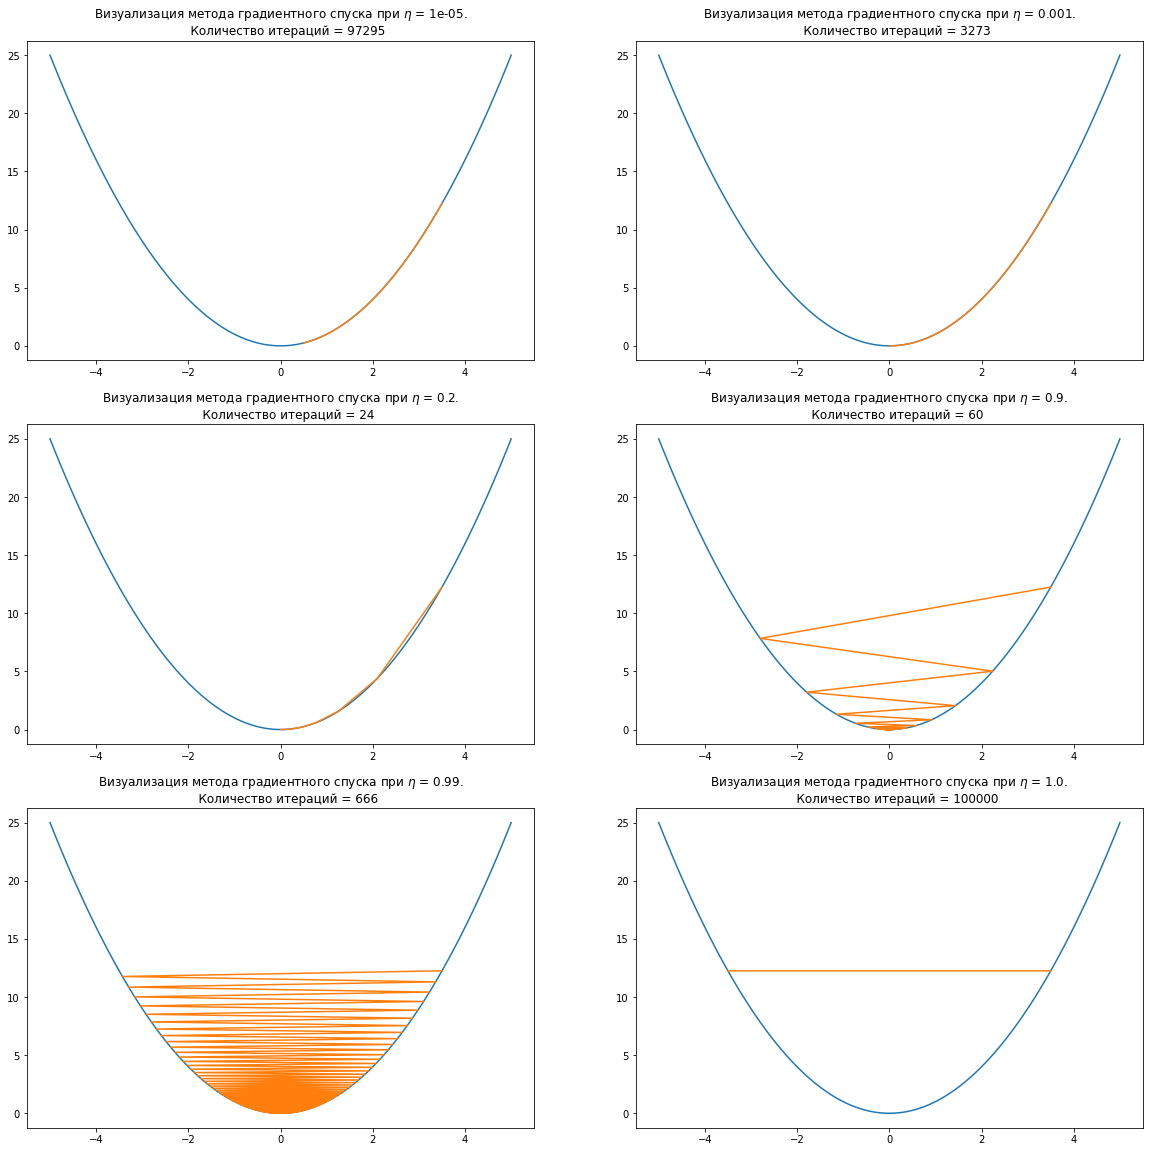

In [4]:
x = np.linspace(-5, 5, 100)

fig, axs = plt.subplots(figsize = (20, 20), nrows = 3, ncols = 2)

i = 0
for xList, countIter, eta in zip(xPointList, countIterList, etaList):
    axs[i // 2][i % 2].plot(x, x**2)
    axs[i // 2][i % 2].plot(xList, xList**2)
    axs[i // 2][i % 2].set_title("Визуализация метода градиентного спуска при $\eta$ = {s[0]}.\n\
    Количество итераций = {s[1]}".format(s = [eta, countIter - 1]))
    i += 1
plt.show()


### 5. Стохастический градиентный спуск:

Метод градиентного спуска обладает одним значительным недостатком: при большом количестве примеров (объектов обучающей выборки) реализация метода достаточно трудоемка поскольку градиент функции $Q(\mathbf{w}, \mathbf{X})$ представляет собой сумму градиентов на каждом объекте выборки. Кроме того, скорость работы метода также зависит от количества признаков.

Один из способов устранения данной проблемы - оценивать градиент не по всем наблюдениям выборки, а лишь по одному, случайно выбранному. Данный подход получил название **стохастического градиентного спуска** [(stochastic gradient descent)](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).

В данном случае, шаги метода можно описать так:

1. Инициализация начального значения вектора весов $\mathbf{w_{0}}$;
2. На очередном шаге $t$, определить случайным образом объект выборки $\mathbf{x}_{i}$, на котором будем оценивать градиент;
3. Рассчитать значение градиента функции $Q(\mathbf{w}, \mathbf{x}_{i})$ в точке $\mathbf{w_{t - 1}}$, рассчитанной на предыдущей итерации;
4. Перерасчитать значение вектора $\mathbf{w_{t}}$ по следующей формуле:

$$
\mathbf{w_{t}} = \mathbf{w_{t - 1}} - \eta_{t}\nabla Q(\mathbf{w}_{t - 1}, \mathbf{x}_{i})
$$

5. Оценить разницу двух последних приближений:

$$
\Big|\Big|\mathbf{w_{t}} - \mathbf{w_{t - 1}}\Big|\Big|_{L_{2}} \le \varepsilon
$$

и в случае, если она превышает некоторое заранее заданное значение $\varepsilon$, перейти к шагу $2$, в противном случае, завершить процесс.

Очевидно, что скорость сходимости метода стохастического градиентного спуска ниже, чем у стандартного метода, но за счет быстрой технической реализации он, как правило отрабатывает быстрее.

### Реализация стохастического градиентного спуска

In [5]:
def mserror(y, y_pred):
    return float (sum((y - y_pred)**2)) / float (y.shape[0])

def linear_prediction(X, w):
    return np.dot(X * w, np.ones(int (X.shape[1])).reshape(int (X.shape[1]), 1))

def sgd(X, y, w_init, 
        eta = 0.01, # шаг градиентного спуска
        eta_const = 1,
        epsilon = 1e-8, # значение, с которым сравниваем разницу двух последних приближений
        max_iter = 1e6, # макс. кол-во итераций (на тот случай, если метод расходится)
        seed = 1488):
    
    w = w_init
    weight_dist = 2 * epsilon
    iter_num = 0    
    errors = []
    np.random.seed(seed)
    
    if(eta_const != 1):
        eta = 1.0 / 2
        
    while weight_dist > epsilon and iter_num < max_iter:
        # Определяем случайным образом объект обучающей выборки, на котором будем оценивать градиент
        random_ind = np.random.randint(X.shape[0])
        
        gradList = []
        for i in range(X.shape[1]):
            gradList.append(2.0 / int(X.shape[0]) * X[random_ind][i] * (sum(X[random_ind] * w) - y[random_ind]))
        w1 = w - eta * np.array(gradList)
        
        weight_dist = np.linalg.norm(w1 - w, ord = 2)
        w = w1
        errors.append(mserror(y, linear_prediction(X, w).reshape(1, X.shape[0])[0]))
        iter_num = iter_num + 1
        
        if(eta_const != 1):
            eta = 1.0 / (iter_num + 2)
        
    return w, errors

### Генерация данных и оценка результатов, полученных с помощью SGD

In [6]:
n = 100
X = np.linspace(-4, 4, n)

np.random.seed(420)
    
y = X**2 + np.random.normal(0, 0.4, n)
X = np.transpose(np.vstack((np.ones(n), X, X**2)))

In [7]:
sgdCoefList = []
sgdErrList = []

# Константный шаг алгоритма
etaList = [0.0001, 0.0005, 0.002]
for eta in etaList: 
    sgd_coef, sgd_err = sgd(X, y, [0, 1, 0], eta = eta)
    sgdCoefList.append(sgd_coef)
    sgdErrList.append(sgd_err)
    print('eta = {s[0]}'.format(s = [eta]))
    print('Equation: {s[0]} + {s[1]} x + {s[2]} x^2'.format(s = [sgd_coef[0], sgd_coef[1], sgd_coef[2]]))
    print('Count Iteration = {s[0]}'.format(s = [len(sgd_err)]))
    print('MSE = {s[0]}'.format(s = [sgd_err[-1]]))
    print()

# Монотонно убывающий шаг алгоритма
sgd_coef, sgd_err = sgd(X, y, [0, 1, 0], eta_const = 0)
sgdCoefList.append(sgd_coef)
sgdErrList.append(sgd_err)
print('eta = 1 / num Iter')
print('Equation: {s[0]} + {s[1]} x + {s[2]} x^2'.format(s = [sgd_coef[0], sgd_coef[1], sgd_coef[2]]))
print('Count Iteration = {s[0]}'.format(s = [len(sgd_err)]))
print('MSE = {s[0]}'.format(s = [sgd_err[-1]]))
print()

# Аналитическое решение
as_coef = np.dot(np.linalg.pinv(X), y)
print('Analytical solution')
print('Equation: {s[0]} + {s[1]} x + {s[2]} x^2'.format(s = [as_coef[0], as_coef[1], as_coef[2]]))
print('MSE = {s[0]}'.format(s = [mserror(y, linear_prediction(X, as_coef).reshape(1, X.shape[0])[0])]))

eta = 0.0001
Equation: 0.00329416313825888 + 0.9977508063668411 x + 0.03307540983282319 x^2
Count Iteration = 306
MSE = 54.689400057375536

eta = 0.0005
Equation: 0.04544133359036496 + 0.9445037896421066 x + 0.4547575779245688 x^2
Count Iteration = 1115
MSE = 20.233470762232987

eta = 0.002
Equation: 0.07987174106039838 + 0.16182195448962627 x + 0.986821875512299 x^2
Count Iteration = 8311
MSE = 0.3098897523884781

eta = 1 / num Iter
Equation: 0.10766057553385208 + 0.46961653212096655 x + 0.9742923198564757 x^2
Count Iteration = 4239
MSE = 1.3906821853201101

Analytical solution
Equation: -0.040681847111143005 + -0.005074973403218941 x + 0.997173788925193 x^2
MSE = 0.15166826783685683


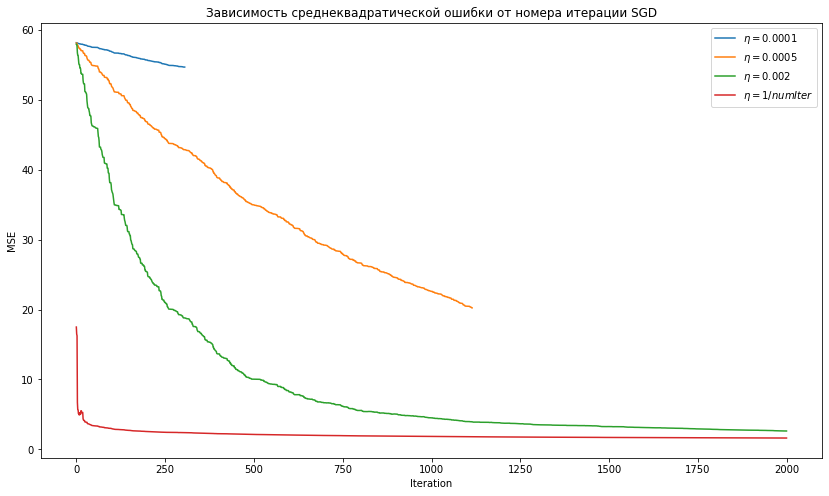

In [8]:
plt.figure(figsize = (14, 8))

legendList = []
for sgd_err, eta in zip(sgdErrList, etaList):
    plt.plot(sgd_err[0 : 2000])
    legendList.append('$\eta = ' + str(eta) + '$')

plt.plot(sgdErrList[-1][0 : 2000])
legendList.append('$\eta = 1 / num Iter$')
    
plt.legend(legendList, loc = 'upper right')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Зависимость среднеквадратической ошибки от номера итерации SGD')

plt.show()

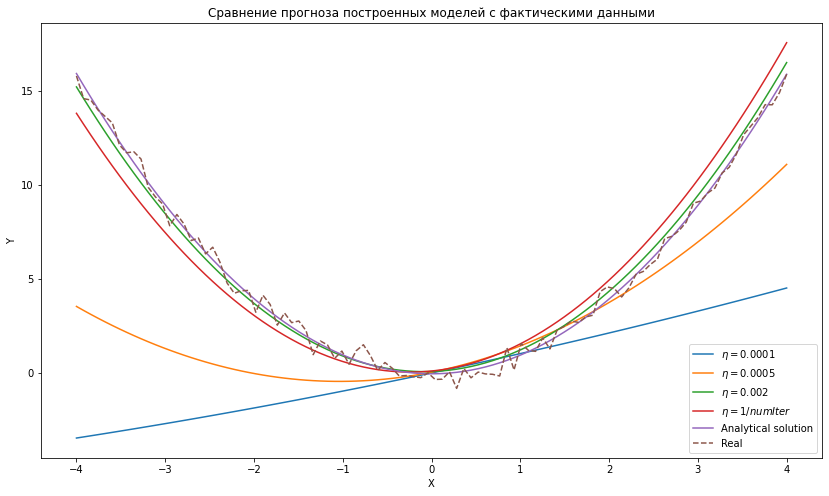

In [9]:
plt.figure(figsize = (14, 8))

for sgdCoef in sgdCoefList: 
    plt.plot(X[:, 1], sgdCoef[0] + sgdCoef[1] * X[:, 1] + sgdCoef[2] * X[:, 2])  

plt.plot(X[:, 1], as_coef[0] + as_coef[1] * X[:, 1] + as_coef[2] * X[:, 2])    
    
plt.plot(X[:, 1], y, '--')
    
plt.legend(legendList + ['Analytical solution', 'Real'], loc = 'lower right')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Сравнение прогноза построенных моделей с фактическими данными')

plt.show()

### Домашнее задание:

1. **Модифицировать реализованную функцию SGD алгоритма так, чтобы градиент оценивался не по одному случайно выбранному наблюдению, а по $n$ наблюдениям, где $n$ - параметр, который функция принимает на вход. Сравнить работу модифицированного метода с исходным.**
2. **Реализовать один из методов оптимизации негладких функций на примере абсолютной функции потерь.**

### 6. Оценка максимального правдоподобия

Обозначим ошибку алгоритма $a$ на объекте $\mathbf{x}_{i}$ через $\varepsilon_{i}$. Тогда 
$$
y_{i} = a(\mathbf{x}_{i}) + \varepsilon_{i}.
$$

В случае, если рассматриваемый алгоритм принадлежит классу линейных алгоритмов, то распределение ошибки удовлетворяет следующим условиям:
- $\mathbb{E}(\varepsilon_{i}) = 0, \quad i = \overline{1, n}$;
- $\mathbb{D}(\varepsilon_{1}) = \mathbb{D}(\varepsilon_{2}) = \ldots = \mathbb{D}(\varepsilon_{n}) = \sigma^{2} < \infty$ ([*гомоскедастичность*](https://en.wikipedia.org/wiki/Homoscedasticity));
- $Cov(\varepsilon_{i}, \varepsilon_{j}) = 0, \quad i \neq j, \quad i, j = \overline{1, n}$.

**Определение.** Пусть случайная величина $X$ имеет распределение $\mathbb{P}_{\theta}(x)$, зависящее от некоторого неизвестного параметра $\theta$. Через вектор $\mathbf{X}^{n} = \Big(X_{1}, \ldots, X_{n}\Big)$ - выборка из случайной величины $X$. Тогда *функцией правдоподия* называется функция вида

$$
\begin{cases}
L_{\theta}(\mathbf{X}^{n}) = \prod\limits_{i = 1}^{n}f_{\theta}(X = X_{i}), \quad \text{в случае, если } \mathbb{P}_{\theta}(x) \text{ - непрерывное распределение}\\
L_{\theta}(\mathbf{X}^{n}) = \prod\limits_{i = 1}^{n}\mathbb{P}_{\theta}(X = X_{i}), \quad \text{в случае, если } \mathbb{P}_{\theta}(x) \text{ - дискретное распределение}
\end{cases}
$$

[*Метод максимального правдоподобия (ММП)*](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) - это метод оценивания неизвестного параметра путем максимизации функции правдоподобия.

Величина
$$
\tilde{\theta} = argmax_{\theta}L_{\theta}(\mathbf{X}^{n})
$$
называется *оценкой максимального правдоподобия*. Данная величина обладает следующими свойствами:

- **Инвариантность.** Если $\tilde{\theta}$ - оценка для $\theta$, то $g(\tilde{\theta})$ - оценка для $g(\theta)$.   
- **Состоятельность.** Оценка $\tilde{\theta}$ сходится к истинному значению по вероятности 
$$
\lim_{n \to \infty}\mathbb{P}\Big(\Big|\tilde{\theta}_{n} - \theta\Big| > \varepsilon\Big) = 0, \quad \forall \varepsilon > 0.
$$
- **Асимптотическая нормальность.** Распределение величины $\sqrt{n}\Big(\tilde\theta_{n} - \theta\Big)$ сходится к нормальному $\mathcal{N}\Big(0, \mathbf{I}_{\infty}^{-1}(\theta)\Big)$, где 

$$
\mathbf{I}_{\infty}^{-1}(\theta) = -\lim_{n \to \infty}\frac{1}{n}\mathbb{E}(\mathbb{H}), \quad \mathbb{H} = \frac{\partial^{2}\ln{L_{\theta}(\mathbf{X}^{n})}}{\partial\theta \partial\theta^{\top}}.
$$  

Для лучшего понимания метода максимального правдоподобия рассмотрим следующий пример:

Пусть в $n_{1} = 100$ независимых испытаниях вакцины против коронавируса антитела выработались у $m_{1} = 75$ человек и в $n_{2} = 200$ независимых испытаниях вакцины против коронавируса антитела выработались у $m_{2} = 120$ человек. Используя ММП необходимо оценить вероятность наступления благоприятного исхода.

Очевидно, что мы имеем дело с биномиальным распределением. Составим функцию правдоподобия:

$$
L = \mathbb{P}(m_{1}, n_{1}) \cdot \mathbb{P}(m_{2}, n_{2}) = C_{n_{1}}^{m_{1}}\cdot C_{n_{2}}^{m_{2}}\cdot p^{m_{1} + m_{2}}(1 - p)^{n_{1} + n_{2} - m_{1} - m_{2}}.
$$

Перейдем к логарифмической функции правдоподобия:

$$
\ln{L} = \ln{\Big(C_{n_{1}}^{m_{1}}\cdot C_{n_{2}}^{m_{2}}\Big)} + (m_{1} + m_{2})\cdot\ln{p} + (n_{1} + n_{2} - m_{1} - m_{2})\cdot\ln{(1 - p)}.
$$

Далее вычислив производную логарифма правдоподобия по $p$ и приравняв ее нулю, получим окончательное выражение для оценки максимального правдоподобия вероятности $p$:

$$
p = \frac{m_{1} + m_{2}}{n_{1} + n_{2}} = \frac{75 + 120}{100 + 200} = \frac{195}{300} = 0.65.
$$

**Утверждение** Если ошибка распределена нормально: 

$$
\varepsilon_{i} \sim \mathcal{N}(0, \sigma^{2}),
$$

то оценка, полученная с помощью МНК, совпадает с оценкой, полученной с помощью ММП. 

**Доказательство:** Мы знаем, что если $z \sim \mathcal{N}\Big(\mu, \sigma^{2}\Big)$, то $(az + b) \sim \mathcal{N}\Big(\mu + b, \sigma^{2}a^{2}\Big)$. Поэтому,

$$
y_{i} = \sum\limits_{j = 0}^{m}w_{j}x_{i}^{j} + \varepsilon_{i} \sim \mathcal{N}\Bigg(\sum\limits_{j = 0}^{m}w_{j}x_{i}^{j}, \sigma^{2}\Bigg).
$$

Следовательно,

$$
L_{w}(\mathbf{X}) = \prod_{i = 1}^{n}f_{w}(X = \mathbf{x}_{i}) = \prod_{i = 1}^{n}\frac{1}{\sqrt{2\pi\sigma^{2}}}\exp{\Bigg(-\frac{\Big(y_{i} - \sum\limits_{j = 0}^{m}w_{j}x_{i}^{j}\Big)^{2}}{2\sigma^{2}}}\Bigg).
$$

Для удобства, перейдем к логарифмической функции правдоподобия
$$
\ln{\Big(L_{w}(\mathbf{X})\Big)} = \ln{\prod_{i = 1}^{n}\frac{1}{\sqrt{2\pi\sigma^{2}}}\exp{\Bigg(-\frac{\Big(y_{i} - \sum\limits_{j = 0}^{m}w_{j}x_{i}^{j}\Big)^{2}}{2\sigma^{2}}}\Bigg)} = \\ =\sum\limits_{i = 1}^{n}\ln{\frac{1}{\sqrt{2\pi\sigma^{2}}}\exp{\Bigg(-\frac{\Big(y_{i} - \sum\limits_{j = 0}^{m}w_{j}x_{i}^{j}\Big)^{2}}{2\sigma^{2}}}\Bigg)} = \\ = \sum\limits_{i = 1}^{n}\Bigg[\ln{\Big(2\pi\sigma^{2}\Big)^{-\frac{1}{2}}} + \ln{\exp{\Bigg(-\frac{\Big(y_{i} - \sum\limits_{j = 0}^{m}w_{j}x_{i}^{j}\Big)^{2}}{2\sigma^{2}}}}\Bigg)\Bigg] = \\ = -\frac{n}{2}\ln{\Big(2\pi\sigma^{2}\Big)} - \frac{1}{2\sigma^{2}}\sum\limits_{i = 1}^{n}\Big(y_{i} - \sum\limits_{j = 0}^{m}w_{j}x_{i}^{j}\Big)^{2}.
$$

Поскольку первое слагаемое в данном уравнении не содержит неизвестных $w_{i}$, то для максимизации правдоподобия, необходимо минимизировать второе слагаемое, а это и есть среднеквадратическая ошибка.   $\blacksquare$


**Утверждение** Если ошибка имеет распределение Лапласа: 

$$
\varepsilon_{i} \sim \mathcal{L}\Big(0, \frac{2}{\sigma^{2}}\Big),
$$

то оценка, полученная с помощью ММП совпадает с оценкой, полученной минимизацией абсолютной функции потерь. 

**Доказательство:** Аналогично предыдущему утверждению можно получить, что

$$
y_{i} = \sum\limits_{j = 0}^{m}w_{j}x_{i}^{j} + \varepsilon_{i} \sim \mathcal{L}\Bigg(\sum\limits_{j = 0}^{m}w_{j}x_{i}^{j}, \frac{2}{\sigma^{2}}\Bigg).
$$

Следовательно,

$$
L_{w}(\mathbf{X}) = \prod_{i = 1}^{n}f_{w}(X = \mathbf{x}_{i}) = \prod_{i = 1}^{n}\frac{\sigma}{2}\exp{\Bigg(-\sigma\Big|y_{i} - \sum\limits_{j = 0}^{m}w_{j}x_{i}^{j}\Big|}\Bigg).
$$

После перехода к логарифмической функции правдоподобия, получим

$$
\ln{\Big(L_{w}(\mathbf{X})\Big)} = \ln{\prod_{i = 1}^{n}\frac{\sigma}{2}\exp{\Bigg(-\sigma\Big|y_{i} - \sum\limits_{j = 0}^{m}w_{j}x_{i}^{j}\Big|}\Bigg)} = \\ = n\ln{\frac{\sigma}{2}} - \sum\limits_{i = 1}^{n}\Big|y_{i} - \sigma\sum\limits_{j = 0}^{m}w_{j}x_{i}^{j}\Big|.  \blacksquare
$$


### 7. Разложение ошибки на смещение и разброс
Как было показано выше, зависимость целевой переменной и предикторов выражается следующей формулой:
$$
\mathbf{y} = a + \mathbf{\varepsilon}.
$$

При этом ошибка удовлетворяет 3 свойствам:
- $\mathbb{E}(\varepsilon_{i}) = 0, \quad i = \overline{1, n}$;
- $\mathbb{D}(\varepsilon_{1}) = \mathbb{D}(\varepsilon_{2}) = \ldots = \mathbb{D}(\varepsilon_{n}) = \sigma^{2} < \infty$ ([*гомоскедастичность*](https://en.wikipedia.org/wiki/Homoscedasticity));
- $Cov(\varepsilon_{i}, \varepsilon_{j}) = 0, \quad i \neq j, \quad i, j = \overline{1, n}$.

Наша задача, построить такую функцию $a^{*}$, которая будет являться наилучшей оценкой для $a$.

Рассмотрим квадратичную функцию потерь и оценим ошибку для функции $a^{*}$:

$$
\mathbf{\varepsilon}^{*} = \mathbb{E}\Big[\Big(\mathbf{y} - a^{*}\Big)^{2}\Big] = \mathbb{E}\Big[\mathbf{y}^{2}\Big] - 2\mathbb{E}\Big[\mathbf{y}a^{*}\Big] + \mathbb{E}\Big[a^{*^{2}}\Big].
$$

Из выражения для дисперсии случайной величины получаем, что первое слагаемое примет следующий вид

$$
\mathbb{E}\Big[\mathbf{y}^{2}\Big] = \mathbb{D}\mathbf{y} + \Big(\mathbb{E}\mathbf{y}\Big)^{2} = \mathbb{E}\Big[\Big(\mathbf{y} - \mathbb{E}\mathbf{y}\Big)^{2}\Big] + \Big(\mathbb{E}\Big[\mathbf{a} + \mathbf{\varepsilon}\Big]\Big)^{2} = \\ = \mathbb{E}\Big[\Big(\mathbf{y} - \mathbb{E}a - \mathbb{E}\varepsilon\Big)^{2}\Big] + \Big(\mathbb{E}\mathbf{a} + \mathbb{E}\mathbf{\varepsilon}\Big)^{2} = \\ = \mathbb{E}\Big[\Big(\mathbf{y} - a\Big)^{2}\Big] + a^{2} = \mathbb{E}\Big[\Big(\mathbf{y} - \mathbf{y} + \mathbf{\varepsilon}\Big)^{2}\Big] + a^{2} = \\ = \mathbb{E}\Big[\mathbf{\varepsilon}^{2}\Big] + a^{2} = \mathbb{D}\mathbf{\varepsilon} + \Big(\mathbb{E}\mathbf{\varepsilon}\Big)^{2} + a^{2} = \mathbb{D}\mathbf{\varepsilon} = a^{2} = \sigma^{2} + a^{2},
$$

а третье

$$
\mathbb{E}\Big[a^{*^{2}}\Big] = \mathbb{D}a^{*} + \Big(\mathbb{E}a^{*}\Big)^{2}.
$$

В свою очередь, второе слагаемое можно расписать так

$$
\mathbb{E}\Big[\mathbf{y}a^{*}\Big] = \mathbb{E}\Big[\Big(a + \mathbf{\varepsilon}\Big)a^{*}\Big] = \mathbb{E}\Big[aa^{*}\Big] + \mathbb{E}\Big[\mathbf{\varepsilon}a^{*}\Big] = \\ = a\mathbb{E}a^{*} + \mathbb{E}\mathbf{\varepsilon}\mathbb{E}a^{*} = a\mathbb{E}a^{*}.
$$

Таким образом, имеем

$$
\mathbf{\varepsilon}^{*} = \sigma^{2} + a^{2} + \mathbb{D}a^{*} + \Big(\mathbb{E}a^{*}\Big)^{2} - 2a\mathbb{E}a^{*} = \\ = \underbrace{\Big(a - \mathbb{E}a^{*}\Big)^{2}}_{\text{Квадрат смещения}} + \underbrace{\mathbb{D}a^{*}}_{\text{Дисперсия оценки (разброс)}} + \underbrace{\sigma^{2}}_{\text{Шум}},
$$

где *смещение* - это отклонение, усредненного прогноза рассматриваемой модели (по различным обучающим выборкам) от прогноза идеальной модели;  *разброс* - показывает насколько разными могут получаться предсказания если обучать алгоритм на разных обучающих выборках; *шум* - характеристика данных, которая будет наблюдаться даже на идеальной модели. 

Мы ничего не можем сделать с шумом, поскольку он является свойством данных, но можем повлиять на первые два слагаемых. Как было показано ранее, МНК дает несмещенные оценки. Но, как правило, чем меньше становится смещение, тем больше модель подгоняется под обучающую выборку, становясь тем самым [*переобученной*](https://en.wikipedia.org/wiki/Overfitting), что приводит к возрастанию дисперсии оценки. Для нахождения некоторого баланса между квадратом смещения и дисперсией оценки используется [*регуляризация*](https://en.wikipedia.org/wiki/Regularization_(mathematics)). 

### 8. Переобучение модели и регуляризация

[*Переобучение*](https://en.wikipedia.org/wiki/Overfitting) - это свойство модели подгоняться под обучающую выборку. В этом случае, качество модели на новых данных становится значительно ниже. Противоположная ситуация - *недообучение*. В случае *недообучения* плохо описывается и обучающая выборка, и новые данные.

<img src="https://raw.githubusercontent.com/foobar167/articles/master/Machine_Learning/Brochure/data/Ris2.6-Nedoobucheniye-optimum-i-pereobucheniye-v-regressii.png">

Одна из причин переобучения - *мультиколлинеарность*. Это ситуация, при которой в выборке имеются линейно зависимые признаки. В этом случае, задача минимизации функционала ошибки будет иметь бесконечно много решений и далеко не все из них будут обладать обобщающей способностью. 

Как определить, что наша модель переобучилась? 
- Один из способов выявить переобучение - использовать **отложенную** выборку. В этом случае, выборка разбивается на 2 части: *train* и *test*. На *train'е* происходит обучение модели. После, обученная модель прогоняется на тестовой выборке и сравнивается на сколько качество на обучении отличается от теста. Как правило, в тренировочную часть попадает 70 - 80% от исходных данных.  

*Преимущество*: обучение происходит один раз.

*Недостаток*: группа схожих объектов, например автомобили марки BMW, могут не попасть в обучение. Таким образом, качество работы модели на таких объектах в дальнейшем может быть плохим.

Для разделения выборки на 2 части можно воспользоваться методом[`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) из библиотеки `sklearn.model_selection` предварительно перемешав данные с помощью метода [`shuffle()`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html) библиотеки `sklearn.utils`.


- Другой способ - [**кросс - валидация**](https://en.wikipedia.org/wiki/Cross-validation_(statistics)). Исходные данные делятся на $k$ фолдов примерно одинаково размера. Затем на $(k - 1)$ блоке производится обучение модели, а оставшаяся часть используется для тестирования. Процедура повторяется $k$ раз, при этом на каждом проходе для проверки выбирается новый блок, а обучение производится на оставшихся.

*Преимущества*: распределение классов оказывается более равномерным, что улучшает качество обучения, оценка является более надежной.
   
*Недостаток*: обучение модели происходит $k$ раз.

Для разбиения выборки на $k$ частей можно воспользоваться методом[`KFold()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) из библиотеки `sklearn.model_selection`. В данной библиотеке также существует метод [`StratifiedKFold()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html), который производит стратифицированное разделение выборки на фолды. Кроме того, можно воспользоваться методом [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), который принимает на вход выбранный алгоритм построения и сразу выдает результаты.


Выбор $k$ зависит от объема выборки.

<img src="https://brettromero.com/wp-content/uploads/2016/05/cross-validation-639x350.png">


In [10]:
from sklearn.model_selection import KFold, StratifiedKFold

y = np.hstack((np.ones(3), 2 * np.ones(6), 3 * np.ones(9)))
x = np.arange(0, 18)

print('-----KFOLD-----')
kf = KFold(n_splits = 3, shuffle = True, random_state = 1)
for train_ind, test_ind in kf.split(x):
    print ('TRAIN:', 
           'Share Value 1 = ' + str(round((y[train_ind] == 1).sum() / float(len(y)), 3)),
           'Share Value 2 = ' + str(round((y[train_ind] == 2).sum() / float(len(y)), 3)),
           'Share Value 3 = ' + str(round((y[train_ind] == 3).sum() / float(len(y)), 3))
          )
           
    print ('TEST:', 
           'Share Value 1 = ' + str(round((y[test_ind] == 1).sum() / float(len(y)), 3)), 
           'Share Value 2 = ' + str(round((y[test_ind] == 2).sum() / float(len(y)), 3)),
           'Share Value 3 = ' + str(round((y[test_ind] == 3).sum() / float(len(y)), 3)),
           end = '\n\n')
 

print()
print('-----STRATIFIED KFOLD-----')
skf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 1)
for train_ind, test_ind in skf.split(x, y):
    print ('TRAIN:', 
           'Share Value 1 = ' + str(round((y[train_ind] == 1).sum() / float(len(y)), 3)),
           'Share Value 2 = ' + str(round((y[train_ind] == 2).sum() / float(len(y)), 3)),
           'Share Value 3 = ' + str(round((y[train_ind] == 3).sum() / float(len(y)), 3))
          )
           
    print ('TEST:', 
           'Share Value 1 = ' + str(round((y[test_ind] == 1).sum() / float(len(y)), 3)), 
           'Share Value 2 = ' + str(round((y[test_ind] == 2).sum() / float(len(y)), 3)),
           'Share Value 3 = ' + str(round((y[test_ind] == 3).sum() / float(len(y)), 3)),
           end = '\n\n')

-----KFOLD-----
TRAIN: Share Value 1 = 0.111 Share Value 2 = 0.167 Share Value 3 = 0.389
TEST: Share Value 1 = 0.056 Share Value 2 = 0.167 Share Value 3 = 0.111

TRAIN: Share Value 1 = 0.056 Share Value 2 = 0.278 Share Value 3 = 0.333
TEST: Share Value 1 = 0.111 Share Value 2 = 0.056 Share Value 3 = 0.167

TRAIN: Share Value 1 = 0.167 Share Value 2 = 0.222 Share Value 3 = 0.278
TEST: Share Value 1 = 0.0 Share Value 2 = 0.111 Share Value 3 = 0.222


-----STRATIFIED KFOLD-----
TRAIN: Share Value 1 = 0.111 Share Value 2 = 0.222 Share Value 3 = 0.333
TEST: Share Value 1 = 0.056 Share Value 2 = 0.111 Share Value 3 = 0.167

TRAIN: Share Value 1 = 0.111 Share Value 2 = 0.222 Share Value 3 = 0.333
TEST: Share Value 1 = 0.056 Share Value 2 = 0.111 Share Value 3 = 0.167

TRAIN: Share Value 1 = 0.111 Share Value 2 = 0.222 Share Value 3 = 0.333
TEST: Share Value 1 = 0.056 Share Value 2 = 0.111 Share Value 3 = 0.167



Для предотвращения переобучения используется [*регуляризация*](https://en.wikipedia.org/wiki/Regularization_(mathematics)). Она накладывает ограничение на сложность модели. В линейных алгоритмах регуляризатор - это штраф за слишком большие веса модели. 

Существует несколько видов регуляризации, самые распространенные из которых $L_{1}$ [(*lasso regression*)](https://en.wikipedia.org/wiki/Lasso_(statistics)) и $L_{2}$ [(*ridge regression*)](https://en.wikipedia.org/wiki/Tikhonov_regularization) регуляризации. 

В первом случае, функция ошибки перепишется слудеющим образом:

$$
Q_{L_{1}}(\mathbf{w}, \mathbf{X}) = Q(\mathbf{w}, \mathbf{X}) + \lambda\sum\limits_{j = 1}^{m}|w_{j}| = \lambda||\mathbf{w}||_{L_{1}},
$$

а во втором 

$$
Q_{L_{2}}(\mathbf{w}, \mathbf{X}) = Q(\mathbf{w}, \mathbf{X}) + \lambda\sum\limits_{j = 1}^{m}w_{j}^{2} = \lambda||\mathbf{w}||_{L_{2}}^{2}.
$$

*Замечание.* Коэффициент сдвига **не входит** в регуляризатор. 

Коэффициент $\lambda$ называется *коэффициентом регуляризации*. Чем больше $\lambda$, тем проще будет модель. Очень большое $\lambda$ приведет к тому, что все веса занулятся. В свою очередь использование очень маленького значения сведёт задачу оптимизации с регуляризатором к исходной задаче без него.   

Коэффициент регуляризации является *гиперпараметром* модели. Гиперпараметры - это параметры, значения которых не оптимизируются в процессе построения модели. Они настраиваются заранее, а для того, чтобы подобрать оптимальные значения гиперпараметров, необходимо проводить многократное обучение модели на разных значениях таких параметров и выбирать оптимальное. 

Недостатком $L_{1}$ регуляризации явлется негладкость соответствующей нормы. При этом $L_{1}$ регуляризатор обладает одним интересным свойством: он позволяет занулить веса при незначимых признаках. 

В случае, если гиперпараметры настраиваются на кросс - валидации, может возникнуть проблема переобучения: значения гиперпараметров могут подогнаться под рассматриваемую выборку. В таком случае, нужно выделять часть выборки, которая не будет использрваться при валидации. На ней будет тестироваться качество полученной модели.

### 9. Пстроение модели: основные этапы

Построим модель, которая по полу, возрасту клиента, доходу и марке автомобиля предсказывает стоимость авто и посмотрим какие проблемы могут возникнуть в ходу построения. 




In [11]:
import pandas as pd
import numpy as np

#Читаем данные и выводим первые пять строк на экран
data = pd.read_csv('Auto.csv', sep = ',')
data.head(5)

,Gender,Age,Income,Car cost,Car maker
0,Female,52.0,1000.0,17200.0,AUDI
1,Male,25.0,560.0,17600.0,AUDI
2,Male,33.0,1270.0,20100.0,BMW
3,Female,38.0,470.0,8400.0,MAZDA
4,Female,31.0,340.0,4400.0,LADA


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     2000 non-null   object 
 1   Age        1978 non-null   float64
 2   Income     1986 non-null   float64
 3   Car cost   2000 non-null   float64
 4   Car maker  2000 non-null   object 
dtypes: float64(3), object(2)
memory usage: 78.2+ KB


### Типы признаков и проблемы, которые могут с ними возникать
1. **Вещественные** (доход, сумма долга, возраст, стаж работы и т.п.);  
2. **Бинарные** (пол, наличие успешных коммуникаций с клиентом, наличие автомобиля и т.п.);
3. **Категориальные (номинальные)** (город проживания, марка автомобиля, группа крови и т.п.)
4. **Категориальные (порядковые)** (образование, стадия болезни, уровень просрочки  и т.п.)


### Преобразование текстовых данных и кодирование категориальных переменных:

Линейные модели не умеют работать с текстовыми данными. Перед тем как строить модель, такую информацию необходимо оцифровать. 

В нашем случае, таких признака два: пол (бинарный признак) и марка автомобиля (категориальный номинальные).

In [13]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
data['Car maker'].unique()

array(['AUDI', 'BMW', 'MAZDA', 'LADA', 'OPEL'], dtype=object)

In [15]:
#Заменяем пол на бинарный признак
data.Gender.replace(['Male', 'Female'], [0, 1], inplace = True)
data.head(5)

,Gender,Age,Income,Car cost,Car maker
0,1,52.0,1000.0,17200.0,AUDI
1,0,25.0,560.0,17600.0,AUDI
2,0,33.0,1270.0,20100.0,BMW
3,1,38.0,470.0,8400.0,MAZDA
4,1,31.0,340.0,4400.0,LADA


In [16]:
data['Gender'].unique()

array([1, 0], dtype=int64)

Признак **"Марка автомобиля"** является категориальным. Перед тем, как оцифровывать его, давайте подумаем: достаточно ли будет перейти от вектора значений 

$$
\begin{bmatrix}
    \text{AUDI},&\text{BMW},&\text{MAZDA},&\text{LADA},&\text{OPEL}
\end{bmatrix}$$
к вектору 
$$
\begin{bmatrix} 
    0,&1,&2,&3,&4
\end{bmatrix}.
$$

Очевидно, что **нет**, поскольку значения номинального признака не сравнимы друг с другом, а в случае с порядковыми признаками, мы можем сказать какое из значений лучше, но при этом не можем сказать на сколько. Для решения данной проблемы существует несколько подходов: 

- *One Hot кодирование* или *dummy кодирование* - создаются $N - 1$ бинарных признаков, где $N$ - число уникальных значений категориальной переменной. Данные бинарные признаки являются индикаторными функциями для значений категориального признака. *One Hot кодирование* позволяет сделать так, чтобы каждому уникальному значению категориального признака соответствовал свой коэффициент $w_{i}$. Это позволит нам не сравнивать категориальные значения одного и того же признака между собой. 
   
   Недостатком *One Hot кодирования* является создание большого числа новых признаков при большом количестве уникальных значений категориального признака. 
   
   
- Одним из вариантов решения данной проблемы является замена значений категориального признака на среднее значение целевой переменной по данной категории:
   
   $$
   \tilde{x}_{j}^{i} = \frac{\sum\limits_{k = 1}^{n}y_{k} \cdot \mathbf{I}_{[x_{j}^{k} = x_{j}^{i}]}}{\sum\limits_{k = 1}^{n}\mathbf{I}_{[x_{j}^{k} = x_{j}^{i}]}},
   $$
где $x_{j}^{k}$ - значение $j$ - го признака (который является категориальным) на $k$ - ом объекте. 


В нашем случае, признак **"Car maker"** принимает всего 5 уникальных значений, поэтому можем воспользоваться методом *One Hot кодирования*. 

В библиотеке `sklearn` для реализации *One-Hot кодирования* существует класс [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).  Кроме того, у pandas dataframe существует метод [`get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) 

In [17]:
data = pd.get_dummies(data, 
                                  prefix = ['Car maker'], 
                                  columns = ['Car maker'], 
                                  #dummy_na = True,       
                                  drop_first = False)

data.head()

,Gender,Age,Income,Car cost,Car maker_AUDI,Car maker_BMW,Car maker_LADA,Car maker_MAZDA,Car maker_OPEL
0,1,52.0,1000.0,17200.0,1,0,0,0,0
1,0,25.0,560.0,17600.0,1,0,0,0,0
2,0,33.0,1270.0,20100.0,0,1,0,0,0
3,1,38.0,470.0,8400.0,0,0,0,1,0
4,1,31.0,340.0,4400.0,0,0,1,0,0


In [18]:
# Проверим, что остались только числовые признаки
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2000 non-null   int64  
 1   Age              1978 non-null   float64
 2   Income           1986 non-null   float64
 3   Car cost         2000 non-null   float64
 4   Car maker_AUDI   2000 non-null   uint8  
 5   Car maker_BMW    2000 non-null   uint8  
 6   Car maker_LADA   2000 non-null   uint8  
 7   Car maker_MAZDA  2000 non-null   uint8  
 8   Car maker_OPEL   2000 non-null   uint8  
dtypes: float64(3), int64(1), uint8(5)
memory usage: 72.4 KB


### Замена пропусков в данных

Зачастую бывает так, что часть данных отсутствует. Например, в результате потери данных или просто потому, что по части объектов их не удалось собрать. Существует несколько способов решения данной проблемы:

 
1. **Вещественный признак**:
 - **Заменить пропущенное значение константой, подходящей по смыслу.** 
 
 Например, если мы рассмотрим признак "Доля кредитов наличными с досрочным погашением", то пропуск мог появиться в результате деления на 0. Его можно заменить нулем. Недостаток такого подхода заключается в том, что клиентов, у которых никогда не было кредита наличными, мы приравниваем к клиентам, у которых он был, но не было досрочного погашения.
 
Для заполнения константами можно использовать метод датафрейма [`fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). 
 
 - **Взять вместо отсутствующих данных среднее, медиану или моду по имеющимся значениям.**
 
 Например, доход клиента можно заменить средним по группе клиентов, схожих с данным. Группировку можно рассмотреть по региону проживания или сфере деятельности. Недостаток такого метода состоит в возможной потере информации: например, у нас не было данных потому, что клиент был безработным.  
 
 
 - **Сгенирировать случайное значение из распределения, полученного на основе существующих значений.** 
 
 Здесь из минусов опять же потеря информации, а также то, что для разных наблюдений будет разной и замена.
 
 
 - **Использовать еще одну вспомогательную модель для предсказания данного пропуска.** 
 
 Данный подход является довольно трудозатратным и также не спасет от потери информации.
 
 
 - **Замена пропуска константой и добавление dummy переменной, несущей информации об отсутствии данных.** 
 
 Такой подход может сократить потери информации, однако, в случае большого числа признаков с пропусками данных, породит большое число новых признаков, что увеличит объем занимаемой памяти, а также время обучения. Кроме того, никто не гарантирует, что соответствующая dummy переменная, в конечном итоге, попадет в итоговую модель.
 

2. **Категориальные данные.**
 - **Заменить пропущенное значение наиболее распространенной категорией или медианной.**
 
 Например, в случае, если не проставлена марка автомобиля, можно разбить данные на несколько групп в зависимости от стоимости авто и заменить пропуск наиболее часто встречающейся маркой в каждой из полученных групп.
 
 - **Заменить пропущенное значение новой категорией.**


Еще один из методов решения проблемы отсутствия данных - **удаление строк с пропусками**. Недостаток данного подхода заключается в потере большого количества информации. Для удаления всех наблюдений, в которых присутствуют пропуски, можно воспользоваться методом датафрейма [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

In [19]:
data.isnull().sum()

Gender              0
Age                22
Income             14
Car cost            0
Car maker_AUDI      0
Car maker_BMW       0
Car maker_LADA      0
Car maker_MAZDA     0
Car maker_OPEL      0
dtype: int64

In [20]:
#Заменяем пропуски в "Возрасте" на среднее значение
data['Age'].fillna(round(data['Age'].mean()), inplace = True)

#Пропуски в доходе заменяем средним по группе марки автомобиля
for i in data.columns:
    if i.startswith('Car maker'):
        data['Income'].fillna(data['Income'][data[i] == 1].mean(), inplace = True)

In [21]:
data.isnull().sum()

Gender             0
Age                0
Income             0
Car cost           0
Car maker_AUDI     0
Car maker_BMW      0
Car maker_LADA     0
Car maker_MAZDA    0
Car maker_OPEL     0
dtype: int64

Для заполнения пропусков средним, медианой или модой можно воспользоваться классом [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) из библиотеки `sklearn.impute`

In [22]:
from sklearn.impute import SimpleImputer

test_data = pd.DataFrame({'Age': [20, 25, np.NaN, np.NaN, 35, 30, 45, 25]})

imp_mean = SimpleImputer(strategy = "mean")
test_data['Age_mean'] = pd.DataFrame(data = imp_mean.fit_transform(test_data), 
                                     columns = test_data.columns)

imp_mode = SimpleImputer(strategy = "most_frequent")
test_data['Age_mode'] = pd.DataFrame(data = imp_mode.fit_transform(test_data[['Age']]), 
                                     columns = test_data[['Age']].columns)

imp_median = SimpleImputer(strategy = "median")
test_data['Age_median'] = pd.DataFrame(data = imp_median.fit_transform(test_data[['Age']]), 
                                     columns = test_data[['Age']].columns)

In [23]:
test_data

,Age,Age_mean,Age_mode,Age_median
0,20.0,20.0,20.0,20.0
1,25.0,25.0,25.0,25.0
2,NaN,30.0,25.0,27.5
3,NaN,30.0,25.0,27.5
4,35.0,35.0,35.0,35.0
5,30.0,30.0,30.0,30.0
6,45.0,45.0,45.0,45.0
7,25.0,25.0,25.0,25.0


In [24]:
print(' Mean = {s[0]}\n Median = {s[1]}\n Mode = {s[2]}'\
      .format(s = [test_data['Age'].mean(), 
                   test_data['Age'].median(), 
                   test_data['Age'].value_counts().index[0]
                  ]
             )
     )

 Mean = 30.0
 Median = 27.5
 Mode = 25.0


### Наличие выбросов в данных

В данных могут присутствовать выбросы, т.е. значения признака сильно отличающиеся отличающиеся от других. Выбросы могут принимать либо очень маленькие значения, либо наоборот - очень большие. Как мы обсуждали ранее, средняя квадратическая ошибка не устойчива к таким наблюдениям и подгоняется под них. Существет несколько способов отыскания выбросов. Мы рассмотрим два из них: гистограмма распределения и интерквартильный размах. 

Для построения гистограммы можно воспользоваться методом датафрейма [`hist()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html). Данный график довольно прост в понимании.

Для визуализации интерквартильного размаха можно воспользоваться функцией [`boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) из библиотеки `seaborn`. `boxplot()` - это коробка с усами и точками. Длина коробки равна интерквартильному размаху, то есть разности квартилей 0.25($Q_{1}$) и 0.75($Q_{3}$). Линия внутри коробки - медиана распределения. Усы коробки соответствуют значениям 

$$
Q_{1} - 1.5\times IQR
$$ 
и 
$$
Q_{3} + 1.5\times IQR.
$$

В результате мы получаем, что внутри интервала, ограниченного усами, лежит более 99.3% выборки. Все, что лежит за усами (обозначено точками) - это выбросы. 

<img src="https://www.simplypsychology.org/boxplot-outliers.png">


### Исследуем непрерывные признаки, а также Target на наличие выбросов 

Посмотрим на распределение таргета

array([[<AxesSubplot:title={'center':'Car cost'}>]], dtype=object)

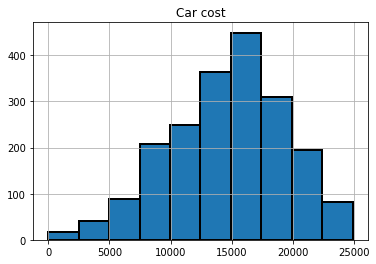

In [25]:
data.hist("Car cost", edgecolor = 'black', linewidth = 2)

Из гистограммы видно, что присутствуют довольно маленькие значения стоимости авто. Построим boxplot и убедимся в наличии выбросов

[Text(0.5, 0, 'Стоимость')]

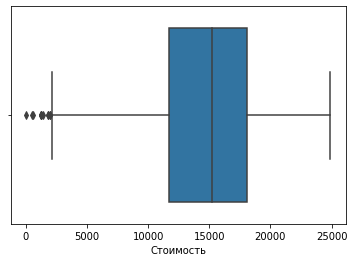

In [26]:
import seaborn as sns

sns.boxplot(x = data['Car cost'], orient = "h").set(xlabel = u'Стоимость')

Boxplot подтверждает наличие выбросов слева. Удалим соответствующие записи, предварительно рассчитав нижнюю и верхнюю квартили, а также интерквартилльный размах 

In [27]:
def get_Q1_Q3_IDR(data, perem):
    Q1 = data[perem].quantile(0.25)
    Q3 = data[perem].quantile(0.75)
    IQR = Q3 - Q1
    Q1_IQR = Q1 - 1.5 * IQR
    Q3_IQR = Q3 + 1.5 * IQR

    print("Q1 = {s[0]}\n\
Q3 = {s[1]}\n\
IQR = {s[2]}\n\
Q1 - IQR = {s[3]}\n\
Q3 + IQR = {s[4]}".format(s = [Q1, Q3, IQR, Q1_IQR, Q3_IQR]))
    
    return (Q1_IQR, Q3_IQR)

Q1_IQR, Q3_IQR = get_Q1_Q3_IDR(data, 'Car cost')

Q1 = 11700.0
Q3 = 18125.0
IQR = 6425.0
Q1 - IQR = 2062.5
Q3 + IQR = 27762.5


In [28]:
def del_outliers(data, left, right, perem):
    return data[(data[perem] > left) & (data[perem] < right)]
    
data = del_outliers(data, Q1_IQR, Q3_IQR, 'Car cost')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1988 non-null   int64  
 1   Age              1988 non-null   float64
 2   Income           1988 non-null   float64
 3   Car cost         1988 non-null   float64
 4   Car maker_AUDI   1988 non-null   uint8  
 5   Car maker_BMW    1988 non-null   uint8  
 6   Car maker_LADA   1988 non-null   uint8  
 7   Car maker_MAZDA  1988 non-null   uint8  
 8   Car maker_OPEL   1988 non-null   uint8  
dtypes: float64(3), int64(1), uint8(5)
memory usage: 87.4 KB


Посмотрим на распределение возраста

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

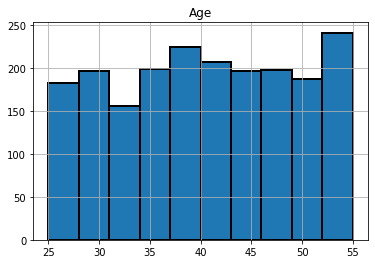

In [30]:
data.hist("Age", edgecolor = 'black', linewidth = 2)

Как видно из гистограммы, выбросов в данном признаке не наблюдается. Это подтверждает и boxplot

[Text(0.5, 0, 'Возраст')]

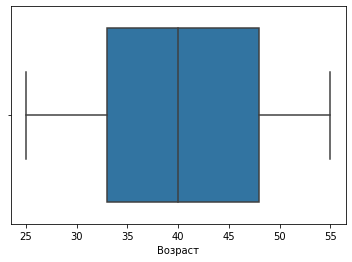

In [31]:
sns.boxplot(x = data['Age'], orient = "h").set(xlabel = u'Возраст')

Посмотрим на распределение дохода

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

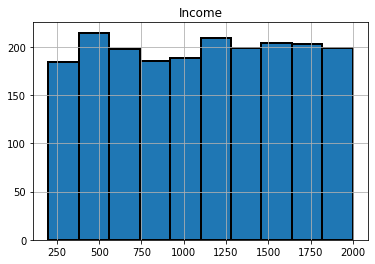

In [32]:
data.hist("Income", edgecolor = 'black', linewidth = 2)

Как видно из графиков, здесь так же не наблюдается выбросов

[Text(0.5, 0, 'Доход')]

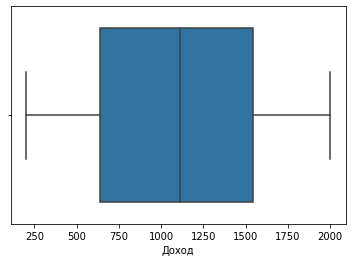

In [33]:
sns.boxplot(x = data['Income'], orient = "h").set(xlabel = u'Доход')

### Стандартизация или нормализация признаков

Часто бывает, что признаки измеряются в разных масштабах. Например, возраст практически всегда не превышает 100, в то время как доход измереятся в десятках и сотнях тысячах. В таких случаях данные должны быть приведены к одному масштабу. Иначе может возникнуть ряд проблем:

- Градиентный метод может сходиться гораздо дольше или не сойтись вовсе;
- Модель может подстроиться под такие признаки, поскольку они будут влиять на ошибку сильнее. В результате чего произойдет переобучение (о том, что это такое и как с этим бороться будет написано ниже);
- Проинтерпретировать результаты моделирования гораздо сложнее, поскольку веса будут иметь также разный масштаб;

Наиболее распространенными методами решения данной проблемы являются *минимаксная нормализация*: 
   
   $$
   \tilde{x}_{i}^{j} = \frac{x_{i}^{j} - \min_{i}x_{i}^{j}}{\max_{i}x_{i}^{j} - \min_{i}x_{i}^{j}}, \quad i = \overline{1, n}, j = \overline{1, m},
   $$
   
и стандартизация признака:
   
   $$
   \tilde{x}_{i}^{j} = \frac{x_{i}^{j} - \bar{x}^{j}}{S_{j}},
   $$
   где $\bar{x}^{j}$ - выборочное среднее $j$ - го признака, $S_{j}$ - выборочная дисперсия $j$ - го признака.
   
Оба этих метода реализованы в библиотеке `sklearn`. Для использования первого необходимо использовать объект [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Если же мы хотим стандартизировать признаки, то нам понадобится объект [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Проиллюстрируем проблему сходимости градиентного спуска на примере функций вида

$$
ax^{2} + by^{2}.
$$

In [34]:
countIterList = []
pointList = []
eta = 0.1

coef_point = np.array([[1, 1], [1, 2], [1, 5], [1, 10]])

for coef in coef_point:
    
    prevPoint = np.array([-5, -5])
    curPoint = np.array([-4, -4])   
    curPointList = [curPoint]
    count_iter = 0
    dist = 1
    
    # шаги метода
    while (dist >= 1e-8) and count_iter <= 1e5:
        prevPoint = curPoint
        curPoint = prevPoint - 2 * eta * np.array(coef) * prevPoint
        count_iter += 1
        curPointList.append(curPoint)

        dist = np.linalg.norm(curPoint - prevPoint, ord = 2)

    countIterList.append(count_iter)
    pointList.append(np.array(curPointList))

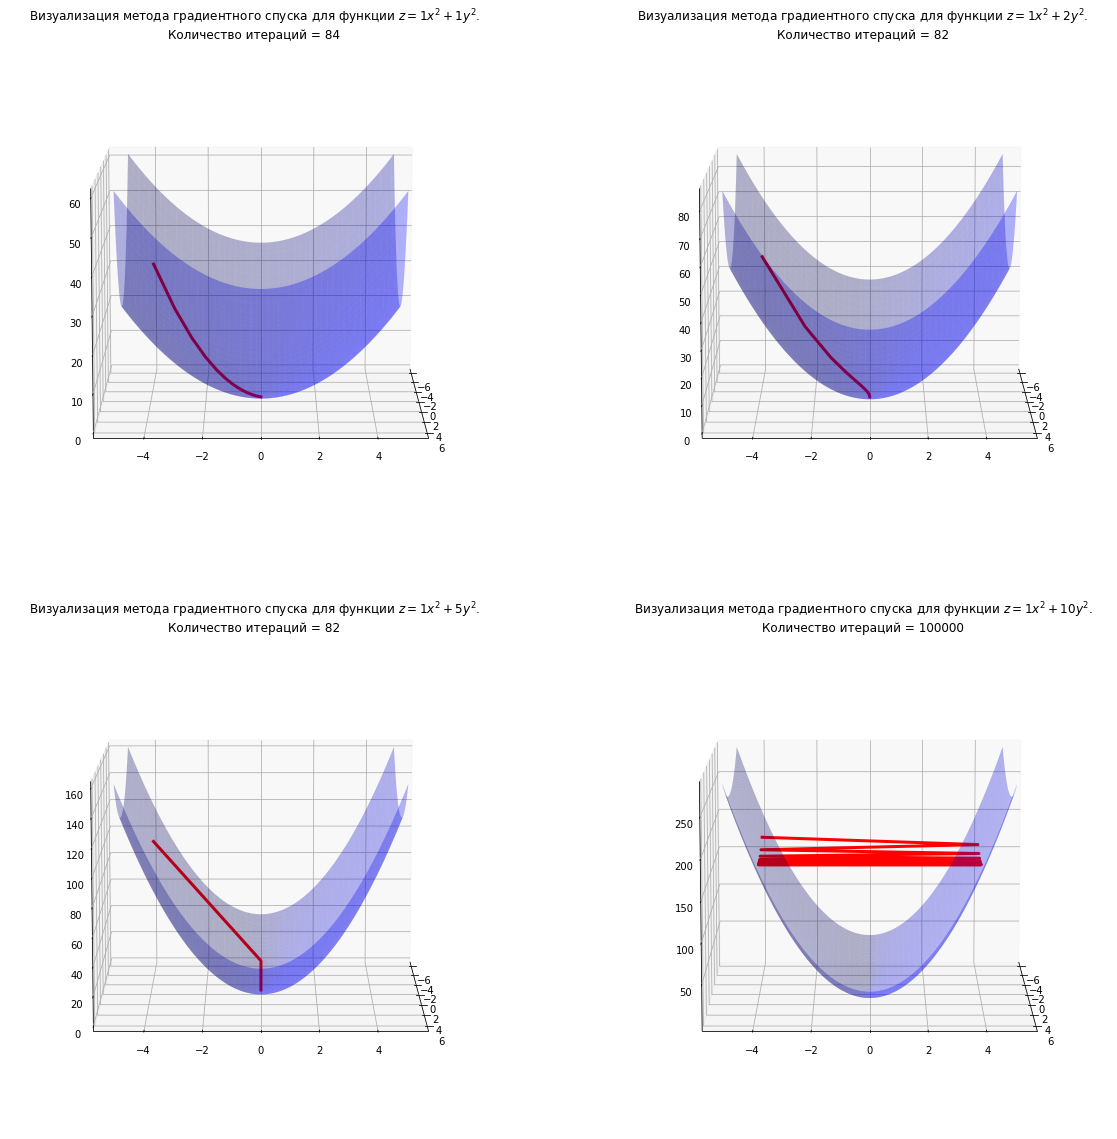

In [35]:
x = np.linspace(-6, 6, 100)
y = np.linspace(-5, 5, 100)
xx, yy = np.meshgrid(x, y)

fig = plt.figure(figsize = (20, 20))

ind = 1
for coef, countIter in zip(coef_point, countIterList):
    
    ax = fig.add_subplot(2, 2, ind, projection = '3d')
    ax.plot_surface(xx, yy, coef[0] * xx**2 + coef[1] * yy**2, color = 'blue', linewidth = 3, alpha = 0.3)
    
    ax.plot3D(pointList[ind - 1][:, 0], pointList[ind - 1][:, 1], 
              coef[0] * pointList[ind - 1][:, 0]**2 + coef[1] * pointList[ind - 1][:, 1]**2,
              color = 'red', linewidth = 3)
    
    ax.view_init(10, 0)
    
    ax.set_title(r'Визуализация метода градиентного спуска для функции $z = {s[0]}x^2 + {s[1]}y^2$.'\
                 .format(s = [coef[0], coef[1]]) + '\nКоличество итераций = {s[0]}'.format(s = [countIter - 1]))
    
    ind += 1


plt.show()

Уже при соотношении коэффициентов 1 : 10 метод перестает сходиться.

In [36]:
data.describe()

,Gender,Age,Income,Car cost,Car maker_AUDI,Car maker_BMW,Car maker_LADA,Car maker_MAZDA,Car maker_OPEL
count,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000
mean,0.497485,40.034205,1099.689162,14793.863179,0.359658,0.278672,0.061871,0.155433,0.144366
std,0.500119,8.764999,518.708365,4648.157426,0.480021,0.448459,0.240982,0.362408,0.351549
min,0.000000,25.000000,200.000000,2100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,640.000000,11775.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,40.000000,1110.000000,15200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,48.000000,1540.000000,18200.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,55.000000,2000.000000,24900.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
#Масштабы непрерывных признаков (Возраст и доход) сильно отличаются.
#Проведем стандартизацию данных признаков

from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(data[['Age', 'Income']].values)
scaled_features_df = pd.DataFrame(scaled_features, index = data.index, columns = data[['Age', 'Income']].columns)
data = data.drop(['Age', 'Income'], axis = 1).merge(scaled_features_df, left_index = True, right_index = True, how = 'left')

# То же самое можно было бы сделать так
#data['Age_st'] = (data.Age - data.Age.mean()) / data.Age.std()
#data['Income_st'] = (data.Income - data.Income.mean()) / data.Income.std()

data.head(5)

,Gender,Car cost,Car maker_AUDI,Car maker_BMW,Car maker_LADA,Car maker_MAZDA,Car maker_OPEL,Age,Income
0,1,17200.0,1,0,0,0,0,1.365523,-0.192236
1,0,17600.0,1,0,0,0,0,-1.715686,-1.040710
2,0,20100.0,0,1,0,0,0,-0.802735,0.328419
3,1,8400.0,0,0,0,1,0,-0.232141,-1.214261
4,1,4400.0,0,0,1,0,0,-1.030973,-1.464947


### Оценка влияния предикторов на целевую переменную

Взаимосвязь таргета с доходом

<AxesSubplot:title={'center':'Dependence of the Target on Income'}, xlabel='Car cost', ylabel='Income'>

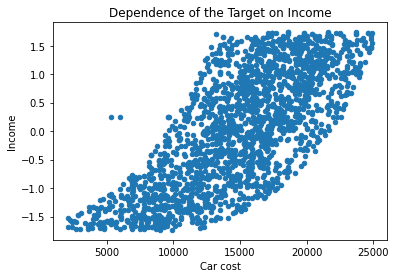

In [38]:
data.plot(x = 'Car cost', y = 'Income', kind = 'scatter', title = 'Dependence of the Target on Income')

Видно, что стоимость автомобиля сильно зависит от дохода. Позже будет показано, что коэффициент корреляции между этими признаками довольно большой.

Кроме того, можно увидеть наличие двух выбросов. Убедимся в этом, построив "ящик с усами" и избавимся от них.

<AxesSubplot:title={'center':'Dependence of the Target on Income'}, xlabel='Car cost', ylabel='Income'>

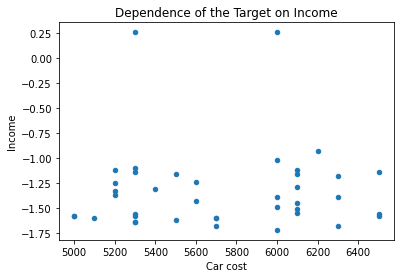

In [39]:
data[(data['Car cost'] >= 5000) & (data['Car cost'] <= 6500)].\
              plot(x = 'Car cost', y = 'Income', kind = 'scatter', title = 'Dependence of the Target on Income')

[Text(0.5, 0, 'Доход')]

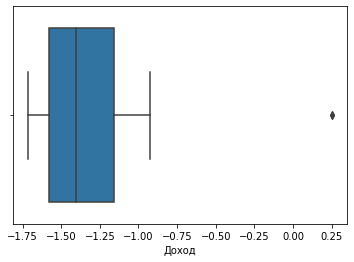

In [40]:
sns.boxplot(x = data['Income'][(data['Car cost'] >= 5000) & (data['Car cost'] <= 6500)], orient = "h").\
        set(xlabel = u'Доход')

In [41]:
Q1_IQR, Q3_IQR = get_Q1_Q3_IDR(data[(data['Car cost'] >= 5000) & (data['Car cost'] <= 6500)], 'Income')

Q1 = -1.5806481145434008
Q3 = -1.1564109750876599
IQR = 0.42423713945574093
Q1 - IQR = -2.217003823727012
Q3 + IQR = -0.5200552659040485


In [42]:
data2 = del_outliers(data[(data['Car cost'] >= 5000) & (data['Car cost'] <= 6500)], Q1_IQR, Q3_IQR, 'Income')
data = pd.concat([data[~((data['Car cost'] >= 5000) & (data['Car cost'] <= 6500))], data2])

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1939
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1986 non-null   int64  
 1   Car cost         1986 non-null   float64
 2   Car maker_AUDI   1986 non-null   uint8  
 3   Car maker_BMW    1986 non-null   uint8  
 4   Car maker_LADA   1986 non-null   uint8  
 5   Car maker_MAZDA  1986 non-null   uint8  
 6   Car maker_OPEL   1986 non-null   uint8  
 7   Age              1986 non-null   float64
 8   Income           1986 non-null   float64
dtypes: float64(3), int64(1), uint8(5)
memory usage: 87.3 KB


Взаимосвязь таргета с возрастом 

<AxesSubplot:title={'center':'Dependence of the Target on Age'}, xlabel='Car cost', ylabel='Age'>

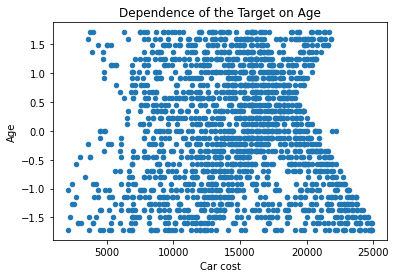

In [44]:
data.plot(x = 'Car cost', y = 'Age', kind = 'scatter', title = 'Dependence of the Target on Age')

Как видно линейно эти данные практически независимы. Коэффициент корреляции между ними порядка $0.036$. На первый взгляд, данные предиктор кажется бесполезным. Однако, не будем торопиться с выводами и оценим влияние возраста еще раз, предварительно просегментировав данные по полу. 

<AxesSubplot:title={'center':'Dependence of the Target on Age for Female'}, xlabel='Car cost', ylabel='Age'>

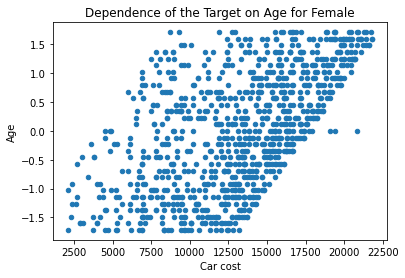

In [45]:
data[data['Gender'] == 1].plot(x = 'Car cost', y = 'Age', kind = 'scatter', title = 'Dependence of the Target on Age for Female')

Здесь же мы видим, что зависимость сильная. Кроме того для разных полов она противоположная, что вполне логично учитывая, что на исходных данных никакой взаимосвязи не наблюдалось. 

<AxesSubplot:title={'center':'Dependence of the Target on Age for Male'}, xlabel='Car cost', ylabel='Age'>

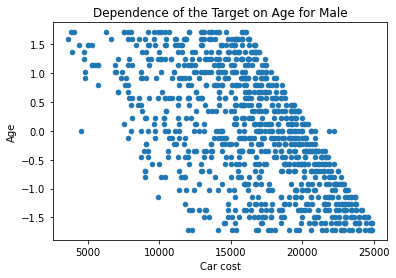

In [46]:
data[data['Gender'] == 0].plot(x = 'Car cost', y = 'Age', kind = 'scatter', title = 'Dependence of the Target on Age for Male')

Зависимость таргета от производителя. 

Для удобства представления, вернемся к исходной категориальной переменной.

C:\Users\myasn\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\myasn\Anaconda2\envs\py36\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


[Text(0.5, 0, 'Производитель'), Text(0, 0.5, 'Стоимость')]

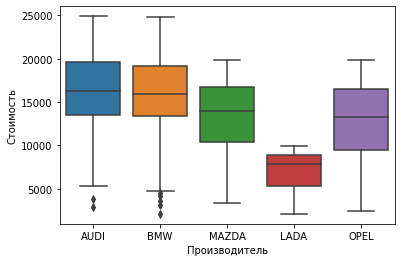

In [47]:
data2 = data[['Car cost']]

data2['Maker'] = data['Car maker_AUDI'] + 2 * data['Car maker_BMW'] + 3 * data['Car maker_MAZDA'] +\
                 4 * data['Car maker_OPEL'] + 5 * data['Car maker_LADA']  

data2.Maker.replace([1, 2, 3, 4, 5], ['AUDI', 'BMW', 'MAZDA', 'OPEL', 'LADA'], inplace = True)

sns.boxplot(y = data2['Car cost'], x = data2['Maker']).set(xlabel = u'Производитель', ylabel = u'Стоимость')

В данном случае, мы получили, что распределение стоимости для марок AUDI и BMW совпадает. Поэтому соответствующие два признака можно объединить в один. Также из графика можно увидеть наличие выбросов по этим производителям. Избавимся от них. 

In [48]:
data['Car maker_AUDI_BMW'] = data['Car maker_BMW'] + data['Car maker_AUDI']
data.drop(['Car maker_BMW', 'Car maker_AUDI'], axis = 1, inplace = True)

data.head()

,Gender,Car cost,Car maker_LADA,Car maker_MAZDA,Car maker_OPEL,Age,Income,Car maker_AUDI_BMW
0,1,17200.0,0,0,0,1.365523,-0.192236,1
1,0,17600.0,0,0,0,-1.715686,-1.040710,1
2,0,20100.0,0,0,0,-0.802735,0.328419,1
3,1,8400.0,0,1,0,-0.232141,-1.214261,0
4,1,4400.0,1,0,0,-1.030973,-1.464947,0


[Text(0.5, 0, 'Производитель'), Text(0, 0.5, 'Стоимость')]

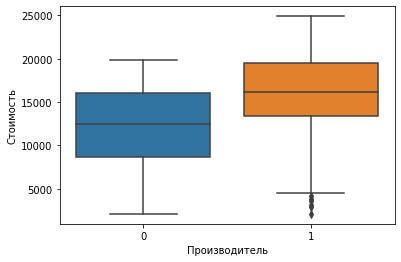

In [49]:
sns.boxplot(y = data['Car cost'], x = data['Car maker_AUDI_BMW']).set(xlabel = u'Производитель', ylabel = u'Стоимость')

In [50]:
Q1_IQR, Q3_IQR = get_Q1_Q3_IDR(data[data['Car maker_AUDI_BMW'] == 1], 'Car cost')

Q1 = 13400.0
Q3 = 19500.0
IQR = 6100.0
Q1 - IQR = 4250.0
Q3 + IQR = 28650.0


In [51]:
data2 = del_outliers(data[data['Car maker_AUDI_BMW'] == 1], Q1_IQR, Q3_IQR, 'Car cost')
data = pd.concat([data[data['Car maker_AUDI_BMW'] == 0], data2])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 3 to 1621
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1980 non-null   int64  
 1   Car cost            1980 non-null   float64
 2   Car maker_LADA      1980 non-null   uint8  
 3   Car maker_MAZDA     1980 non-null   uint8  
 4   Car maker_OPEL      1980 non-null   uint8  
 5   Age                 1980 non-null   float64
 6   Income              1980 non-null   float64
 7   Car maker_AUDI_BMW  1980 non-null   uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 85.1 KB


Проверим, что выбросов не осталось

[Text(0.5, 0, 'Производитель'), Text(0, 0.5, 'Стоимость')]

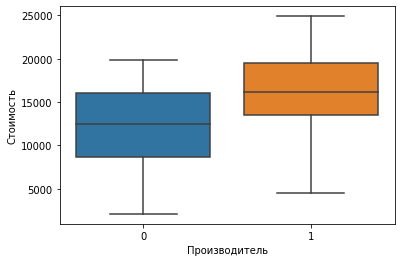

In [53]:
sns.boxplot(y = data['Car cost'], x = data['Car maker_AUDI_BMW']).set(xlabel = u'Производитель', ylabel = u'Стоимость')

### Расчет корреляций

Оцифруем линейную зависимость между переменными и посмотрим на 2 вещи:

- Есть ли признаки, слабо влияющие на целевую переменную. При наличии таковых, их можно выбросить либо подумать над их модификацией, например, переходу к спрямляющему пространству, с целью увеличения зависимости. 


- Есть ли среди предикторов линейно зависимые. Наличие линейно зависимых признаков приводит к проблеме мультиколлинеарности, о которой было упомянуто ранее. В этом случае, из линейно зависимых признаков нужно оставить один. Например, взяв признак с наибольшей линейной зависимостью с таргетом. Либо последовательно обучив модель с каждым из признаков в отдельности и выбрав тот, с которым качество модели наилучшее. 

<AxesSubplot:>

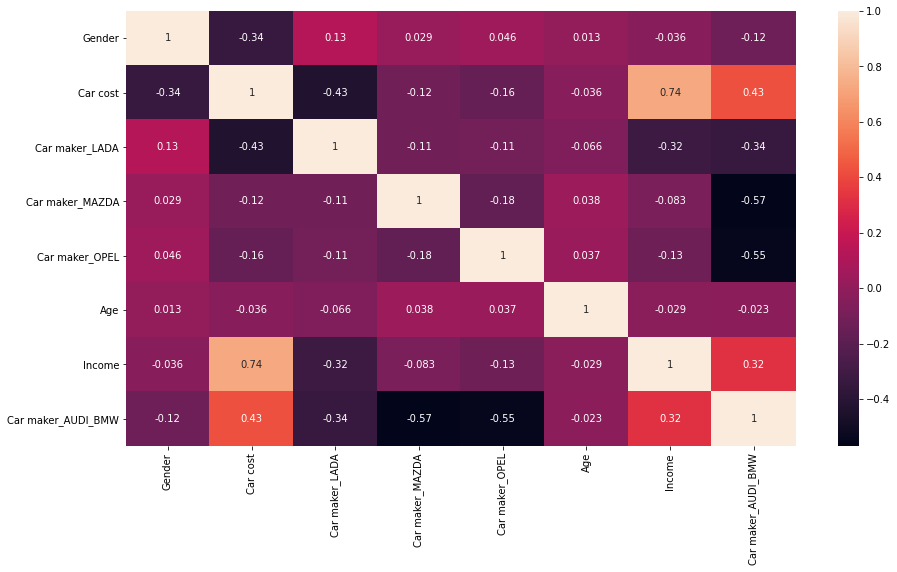

In [54]:
plt.subplots(figsize = (15, 8))
sns.heatmap(data.corr(), annot = True)

У таргета наименьшая линейная зависимость наблюдается с возрастом. Но, как было показано выше, данная проблема решается сегментацией модели по полу. После разбиения выборки на две, корреляция между стоимостью и возрастом будет равна $-0.6$ и $0.57$ соответственно. Среди предикторов наибольший коэффициент линейной зависимости равен $0.57$, что является вполне допустимым.

<AxesSubplot:>

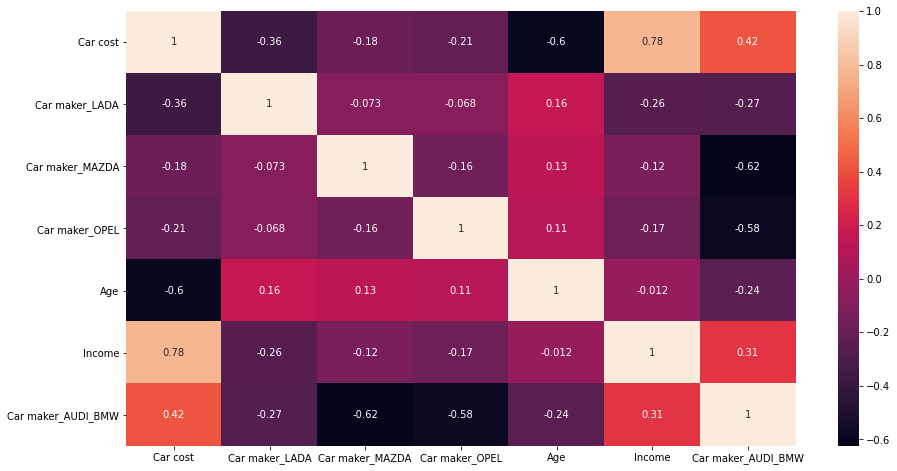

In [55]:
plt.subplots(figsize = (15, 8))
sns.heatmap(data.drop('Gender', axis = 1)[data.Gender == 0].corr(), annot = True)

<AxesSubplot:>

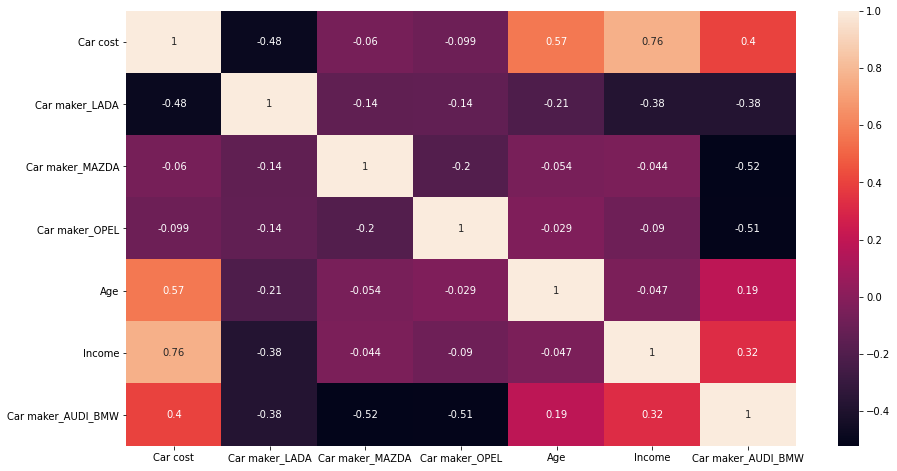

In [56]:
plt.subplots(figsize = (15, 8))
sns.heatmap(data.drop('Gender', axis = 1)[data.Gender == 1].corr(), annot = True)

### Построение модели

Рассмотрим 2 случая:
- Построим одну модель без сегментации по полу
- Построим 2 модели, просегментировав данные по полу

In [57]:
from sklearn.utils import shuffle
# Перемешаем данные и отделим целевую переменную от предикторов
data = shuffle(data, random_state = 123)

X = data.drop(['Car cost'], 1)
Y = data['Car cost']

In [58]:
from sklearn.model_selection import train_test_split

#Разделим выборку на две части 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
            stratify = X[['Gender', 'Car maker_AUDI_BMW', 'Car maker_OPEL', 'Car maker_MAZDA', 'Car maker_LADA']], 
            random_state = 123)

Посмотрим на ошибку на кросс - валидации и сравним ее со случаем деления выборки на две части

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, metrics

cv_scores = cross_val_score(linear_model.LinearRegression(), 
                            X_train, Y_train, 
                            cv = 3, 
                            scoring = "neg_root_mean_squared_error")

for scores in cv_scores:
    print(scores)
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

-2454.1850011902743
-2688.619301526278
-2600.517482675959
Mean CV MSE = 2581.1073


### Случай 1:

In [60]:
def build_model(model, modelName, X_train, Y_train, X_test, Y_test, peremList):
    model.fit(X_train, Y_train)
    
    pred_test = model.predict(X_test)
    rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, pred_test))
    r2_test = metrics.r2_score(Y_test, pred_test)
                                    
    pred_train = model.predict(X_train)
    rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, pred_train))
    r2_train = metrics.r2_score(Y_train, pred_train)

    print(10 * '-' + modelName + 10 * '-')
    print('TRAIN:   RMSE = {:.2f}, R^2 = {:.2f}'.format(rmse_train, r2_train)) 
    print("TEST:    RMSE = {:.2f}, R^2 = {:.2f}".format(rmse_test, r2_test)) 
    
    print('y = {:.2f}'.format(model.intercept_), end = '')
    for ind, perem in enumerate(peremList):
        print(" + {:.2f} *".format(model.coef_[ind]), end = ' ')
        print(perem, end = ' ')
        if ((ind + 1) % 4 == 0):
            print("\n    ", end = '')
    print()
    print()
    

modelList = [linear_model.LinearRegression(), 
             linear_model.Lasso(alpha = 0.5),
             linear_model.Lasso(alpha = 4.0),
             linear_model.Lasso(alpha = 10.0),
             linear_model.Ridge(alpha = 0.5),
             linear_model.Ridge(alpha = 4.0),
             linear_model.Ridge(alpha = 10.0),
             linear_model.HuberRegressor(epsilon = 1),
             linear_model.HuberRegressor(epsilon = 5)]

modelNameList = ['LinREg',
                 'Lasso(alpha = 0.5)', 
                 'Lasso(alpha = 4.0)',
                 'Lasso(alpha = 10.0)',
                 'Ridge(alpha = 0.5)', 
                 'Ridge(alpha = 4.0)',
                 'Ridge(alpha = 10.0)',
                 'Huber(epsilon = 1.0)',
                 'Huber(epsilon = 5.0)']

for model, modelName in zip(modelList, modelNameList):
    build_model(model, modelName, X_train, Y_train, X_test, Y_test, list(X_train.columns))

----------LinREg----------
TRAIN:   RMSE = 2562.23, R^2 = 0.69
TEST:    RMSE = 2654.00, R^2 = 0.68
y = 15244.95 + -2750.52 * Gender  + -2357.33 * Car maker_LADA  + 302.37 * Car maker_MAZDA  + 453.60 * Car maker_OPEL 
     + 3.60 * Age  + 2904.77 * Income  + 1601.35 * Car maker_AUDI_BMW 

----------Lasso(alpha = 0.5)----------
TRAIN:   RMSE = 2562.23, R^2 = 0.69
TEST:    RMSE = 2653.82, R^2 = 0.68
y = 15694.51 + -2749.03 * Gender  + -2799.95 * Car maker_LADA  + -144.77 * Car maker_MAZDA  + 0.00 * Car maker_OPEL 
     + 3.16 * Age  + 2904.95 * Income  + 1150.27 * Car maker_AUDI_BMW 

----------Lasso(alpha = 4.0)----------
TRAIN:   RMSE = 2562.34, R^2 = 0.69
TEST:    RMSE = 2652.68, R^2 = 0.68
y = 15665.23 + -2738.64 * Gender  + -2721.56 * Car maker_LADA  + -97.93 * Car maker_MAZDA  + 0.00 * Car maker_OPEL 
     + 0.08 * Age  + 2905.99 * Income  + 1168.95 * Car maker_AUDI_BMW 

----------Lasso(alpha = 10.0)----------
TRAIN:   RMSE = 2562.88, R^2 = 0.69
TEST:    RMSE = 2651.73, R^2 = 0.68


Полученные результаты хорошо демонстрируют свойство $L_{1}$ регуляризатора - обнуление весов при незначимых признаках.

### Случай 2:

##### Модель 1

In [61]:
X_male = X[X.Gender == 0].drop('Gender', axis = 1)

X_train_male = X_male[list(map(lambda z: z in X_train.index, X_male.index))]
X_train_male.sort_index(inplace = True)

X_test_male = X_male[list(map(lambda z: z in X_test.index, X_male.index))]
X_test_male.sort_index(inplace = True)

Y_train_male = Y_train[list(map(lambda z: z in X_train_male.index, Y_train.index))]
Y_train_male.sort_index(inplace = True)

Y_test_male = Y_test[list(map(lambda z: z in X_test_male.index, Y_test.index))]
Y_test_male.sort_index(inplace = True)

for model, modelName in zip(modelList, modelNameList):
    build_model(model, modelName, X_train_male, Y_train_male, X_test_male, Y_test_male, list(X_train_male.columns))

----------LinREg----------
TRAIN:   RMSE = 946.45, R^2 = 0.95
TEST:    RMSE = 1026.89, R^2 = 0.95
y = 15738.89 + -1456.75 * Car maker_LADA  + 428.01 * Car maker_MAZDA  + 358.81 * Car maker_OPEL  + -2499.55 * Age 
     + 3217.74 * Income  + 669.92 * Car maker_AUDI_BMW 

----------Lasso(alpha = 0.5)----------
TRAIN:   RMSE = 946.46, R^2 = 0.95
TEST:    RMSE = 1026.80, R^2 = 0.95
y = 16163.72 + -1864.19 * Car maker_LADA  + 0.00 * Car maker_MAZDA  + -62.00 * Car maker_OPEL  + -2499.59 * Age 
     + 3218.29 * Income  + 244.22 * Car maker_AUDI_BMW 

----------Lasso(alpha = 4.0)----------
TRAIN:   RMSE = 946.88, R^2 = 0.95
TEST:    RMSE = 1026.53, R^2 = 0.95
y = 16140.46 + -1719.10 * Car maker_LADA  + 0.00 * Car maker_MAZDA  + -9.96 * Car maker_OPEL  + -2499.71 * Age 
     + 3221.92 * Income  + 261.49 * Car maker_AUDI_BMW 

----------Lasso(alpha = 10.0)----------
TRAIN:   RMSE = 948.49, R^2 = 0.95
TEST:    RMSE = 1027.05, R^2 = 0.95
y = 16137.83 + -1508.34 * Car maker_LADA  + 0.00 * Car maker

C:\Users\myasn\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\myasn\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Модель 2

In [62]:
X_female = X[X.Gender == 1].drop('Gender', axis = 1)

X_train_female = X_female[list(map(lambda z: z in X_train.index, X_female.index))]
X_train_female.sort_index(inplace = True)

X_test_female = X_female[list(map(lambda z: z in X_test.index, X_female.index))]
X_test_female.sort_index(inplace = True)

Y_train_female = Y_train[list(map(lambda z: z in X_train_female.index, Y_train.index))]
Y_train_female.sort_index(inplace = True)

Y_test_female = Y_test[list(map(lambda z: z in X_test_female.index, Y_test.index))]
Y_test_female.sort_index(inplace = True)

for model, modelName in zip(modelList, modelNameList):
    build_model(model, modelName, X_train_female, Y_train_female, X_test_female, Y_test_female, list(X_train_female.columns))

----------LinREg----------
TRAIN:   RMSE = 954.93, R^2 = 0.95
TEST:    RMSE = 922.62, R^2 = 0.95
y = -112490331759518864.00 + 112490331759531328.00 * Car maker_LADA  + 112490331759532400.00 * Car maker_MAZDA  + 112490331759532160.00 * Car maker_OPEL  + 2488.62 * Age 
     + 3314.51 * Income  + 112490331759532304.00 * Car maker_AUDI_BMW 

----------Lasso(alpha = 0.5)----------
TRAIN:   RMSE = 951.33, R^2 = 0.95
TEST:    RMSE = 913.52, R^2 = 0.96
y = 13413.14 + -955.06 * Car maker_LADA  + 0.00 * Car maker_MAZDA  + -167.70 * Car maker_OPEL  + 2469.52 * Age 
     + 3289.72 * Income  + 72.14 * Car maker_AUDI_BMW 

----------Lasso(alpha = 4.0)----------
TRAIN:   RMSE = 951.54, R^2 = 0.95
TEST:    RMSE = 914.92, R^2 = 0.96
y = 13392.10 + -895.07 * Car maker_LADA  + 0.00 * Car maker_MAZDA  + -124.31 * Car maker_OPEL  + 2468.46 * Age 
     + 3291.90 * Income  + 86.76 * Car maker_AUDI_BMW 

----------Lasso(alpha = 10.0)----------
TRAIN:   RMSE = 952.64, R^2 = 0.95
TEST:    RMSE = 918.12, R^2 = 0

C:\Users\myasn\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\myasn\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


После сегментации выборки по полу, качество модели заметно повысилось. Учитывая, что распределение выборки по полу равномерное, то для расчета RMSE по полной выборке можно взять среднее лучших моделей по каждому из сегментов.

In [63]:
data.groupby(by = 'Gender').agg({'Gender': 'count'})

,Gender
Gender,
0,998
1,982


Напоследок вспомним, что коэффициент регуляризации является гиперпараметром и покажем как можно искать для него оптимальное значение. 

Один из возможных вариантов поиска - поиск по сетке. В `sklearn.model_selection` для этого реализованы два метода: [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) и [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Существуют и другие методы поиска оптимальных гиперпараметров, один из которых - генетический алгоритм. О нем мы поговорим подробнее, когда будем разбирать алгоритмы градиентного бустинга.

C:\Users\myasn\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19161100.1382899, tolerance: 909226.5462365592
  positive)
C:\Users\myasn\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34704533.69512719, tolerance: 867935.9225806452
  positive)
C:\Users\myasn\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23900247.943081558, tolerance: 857534.7489270386
  positive)
C:\Users\myasn\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to incr

Text(0, 0.5, 'CV score')

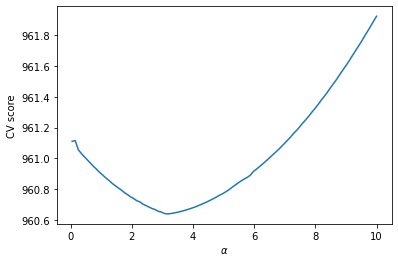

In [74]:
from sklearn.model_selection import GridSearchCV

alpha = np.linspace(0.05, 10, 100)

gs = GridSearchCV(linear_model.Lasso(), 
                    {"alpha": alpha}, 
                    scoring = "neg_root_mean_squared_error", 
                    cv = 3)

gs.fit(X_train_male, Y_train_male)


plt.plot(alpha, -gs.cv_results_["mean_test_score"])
plt.xlabel(r"$\alpha$")
plt.ylabel("CV score")

In [75]:
print("Best alpha = {0}".format(gs.best_params_["alpha"]))

Best alpha = 3.1656565656565654
